In [ ]:
#164/500 version

In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.neighbors import KNeighborsClassifier


from xgboost import XGBClassifier

from scipy.stats import zscore


from keras.models import Sequential
from keras.layers import Dense
# from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import VotingClassifier

In [ ]:
df = pd.read_csv("../content/drive/MyDrive/creditcard.csv")

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df_s_1= df[df.Class==1]
df_s_0= df[df.Class==0]


In [ ]:
df_s_0.shape

(284315, 31)

In [ ]:
df_s_1.shape

(492, 31)

In [ ]:
#lst = range(500000)
#test_1,test_2= np.array_split(df_s_0, 2)

In [ ]:
df_s_0_random=df_s_0
df_s_1_random=df_s_1

In [ ]:
#randomise index for class 0, 1 rows

In [ ]:
df_s_0_random.sample(frac=1,random_state=42).reset_index(drop=True)
df_s_1_random.sample(frac=1,random_state=42).reset_index(drop=True)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,28692.0,-29.200329,16.155701,-30.013712,6.476731,-21.225810,-4.902997,-19.791248,19.168327,-3.617242,...,1.809371,-2.175815,-1.365104,0.174286,2.103868,-0.209944,1.278681,0.372393,99.99,1
1,21662.0,-18.018561,10.558600,-24.667741,11.786180,-10.564657,-2.645681,-18.023468,2.693655,-6.219464,...,-2.319479,0.908839,1.352904,-1.059222,0.185751,0.687037,2.078081,-1.429517,1.00,1
2,85285.0,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,...,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.00,1
3,91075.0,-1.855061,1.554964,-1.405809,0.669327,-0.280230,1.178652,-3.459979,-2.815155,1.242229,...,-0.095308,0.946629,-0.297403,-0.368344,0.198731,-0.078591,0.366709,0.073767,38.76,1
4,26585.0,-19.856322,12.095893,-22.464083,6.115541,-15.148022,-4.346724,-15.648507,13.276805,-3.974162,...,1.750730,-1.409636,-0.809809,0.121397,1.350300,-0.224292,1.597621,0.476920,99.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,40662.0,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,...,0.247913,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,1.00,1
488,84789.0,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,...,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33,1
489,102676.0,-5.552122,5.678134,-9.775528,8.416295,-4.409844,-1.506235,-6.899839,3.750443,-3.879793,...,1.128472,0.228484,0.286258,-0.536294,-0.104925,0.420919,-0.297557,-0.946184,119.74,1
490,150138.0,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,...,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,50.00,1


In [ ]:
df_s_0.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#break dataframe into 3 grps
df_0_random_1,df_0_random_2,df_0_random_3= np.array_split(df_s_0_random, 3)
df_1_random_1,df_1_random_2,df_1_random_3= np.array_split(df_s_1_random, 3)

In [ ]:
print(df_1_random_1.shape)
print(df_1_random_2.shape)
print(df_1_random_3.shape)

(164, 31)
(164, 31)
(164, 31)


In [ ]:
print(df_0_random_1.shape)
print(df_0_random_2.shape)
print(df_0_random_3.shape)

(94772, 31)
(94772, 31)
(94771, 31)


In [ ]:
#random 500 samples
df_0_random_1_500 = df_0_random_1.sample(n=500,random_state=42)
df_0_random_2_500 = df_0_random_2.sample(n=500,random_state=42)
df_0_random_3_500 = df_0_random_3.sample(n=500,random_state=42)

In [ ]:
df_0_random_3_500.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
277843,167888.0,-0.363541,0.937941,-0.212423,-0.722858,0.294758,-0.613928,0.475393,0.455869,-0.341996,...,-0.183416,-0.569892,0.099420,-0.423170,-0.488916,0.150563,0.115048,0.012566,8.99,0
226424,144619.0,-1.198211,0.754206,1.013087,-3.422907,-0.331566,-1.116562,0.588543,-0.205702,2.622866,...,0.148588,1.032341,-0.348202,-0.001378,0.125628,-0.303953,0.409555,0.171938,1.00,0
251126,155232.0,1.477874,-1.208457,-1.504905,0.389738,0.061233,0.530460,0.014598,0.030016,0.556186,...,0.180436,-0.023841,-0.133702,-0.161772,-0.206579,0.236343,-0.094704,-0.013354,298.20,0
199303,132900.0,0.002514,-0.038347,-1.176468,-3.264068,2.635909,3.128413,0.094598,0.829865,0.864369,...,0.154075,0.525627,-0.027684,0.745122,-0.667404,-0.276153,0.246792,0.215158,11.41,0
222244,142893.0,-0.266172,1.052872,1.445066,2.701207,0.521139,1.137238,0.074776,0.381906,-1.051965,...,0.322990,0.822945,0.008233,0.672099,-0.499777,-0.119449,-0.218043,0.023107,7.56,0


In [ ]:
df_0_random_1_500.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
88019,61948.0,1.149774,0.273229,0.597437,1.276160,-0.370375,-0.564608,0.014269,-0.058884,0.007765,...,0.086148,0.305607,-0.009530,0.393870,0.488196,-0.319746,0.037340,0.025182,10.76,0
36568,38595.0,1.222557,-0.829663,0.267204,-0.567105,-0.880758,-0.101597,-0.614431,0.101469,-0.672674,...,0.153175,0.402099,-0.122005,0.043742,0.541339,-0.135970,0.004580,0.001817,59.12,0
61286,49746.0,1.289304,-0.673465,1.110797,-0.599252,-1.431212,-0.432704,-1.030534,0.006374,-0.538957,...,0.445404,1.289010,-0.050690,0.464544,0.332280,-0.043238,0.057544,0.029087,22.00,0
9411,13819.0,1.302131,0.041913,0.469793,0.073850,-0.257537,-0.280825,-0.338909,-0.171775,1.658952,...,-0.394095,-0.910820,0.021071,-0.624045,0.132002,0.808439,-0.090425,0.002488,22.94,0
32392,36777.0,0.274243,-1.329030,-0.274801,1.389771,-0.502576,0.238009,0.470987,0.059766,-0.111206,...,0.393835,0.068006,-0.526811,-0.321919,0.400615,-0.292627,-0.065605,0.082981,468.07,0


In [ ]:
#combine class 1 and 0 split dataframes

com=[df_0_random_1_500,df_1_random_1]
df_new_random_1=pd.concat(com)
df_new_random_1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
88019,61948.0,1.149774,0.273229,0.597437,1.276160,-0.370375,-0.564608,0.014269,-0.058884,0.007765,...,0.086148,0.305607,-0.009530,0.393870,0.488196,-0.319746,0.037340,0.025182,10.76,0
36568,38595.0,1.222557,-0.829663,0.267204,-0.567105,-0.880758,-0.101597,-0.614431,0.101469,-0.672674,...,0.153175,0.402099,-0.122005,0.043742,0.541339,-0.135970,0.004580,0.001817,59.12,0
61286,49746.0,1.289304,-0.673465,1.110797,-0.599252,-1.431212,-0.432704,-1.030534,0.006374,-0.538957,...,0.445404,1.289010,-0.050690,0.464544,0.332280,-0.043238,0.057544,0.029087,22.00,0
9411,13819.0,1.302131,0.041913,0.469793,0.073850,-0.257537,-0.280825,-0.338909,-0.171775,1.658952,...,-0.394095,-0.910820,0.021071,-0.624045,0.132002,0.808439,-0.090425,0.002488,22.94,0
32392,36777.0,0.274243,-1.329030,-0.274801,1.389771,-0.502576,0.238009,0.470987,0.059766,-0.111206,...,0.393835,0.068006,-0.526811,-0.321919,0.400615,-0.292627,-0.065605,0.082981,468.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57615,47982.0,-1.232804,2.244119,-1.703826,1.492536,-1.192985,-1.686110,-1.864612,0.856122,-1.973535,...,0.560475,0.165682,-0.013754,0.474935,-0.218725,0.302809,0.466031,0.250134,0.76,1
58422,48380.0,-2.790771,-1.464269,1.031165,1.921356,-0.090014,-0.483871,0.780731,-0.348776,0.609133,...,-0.392667,0.440020,0.777659,0.418552,0.244563,-0.159361,0.060540,0.356958,208.58,1
58761,48533.0,1.243848,0.524526,-0.538884,1.209196,0.479538,-0.197429,0.049166,0.037792,0.128119,...,-0.051660,-0.084089,-0.192846,-0.917392,0.681953,-0.194419,0.045917,0.040136,1.00,1
59539,48884.0,-2.139051,1.394368,-0.612035,1.049327,-1.162102,-0.768219,-1.997237,0.574997,-0.980832,...,0.696955,0.740003,-0.155115,-0.050607,0.268368,-0.469433,-0.405814,-0.152171,19.73,1


CPU times: user 7.7 s, sys: 284 ms, total: 7.98 s
Wall time: 7.86 s


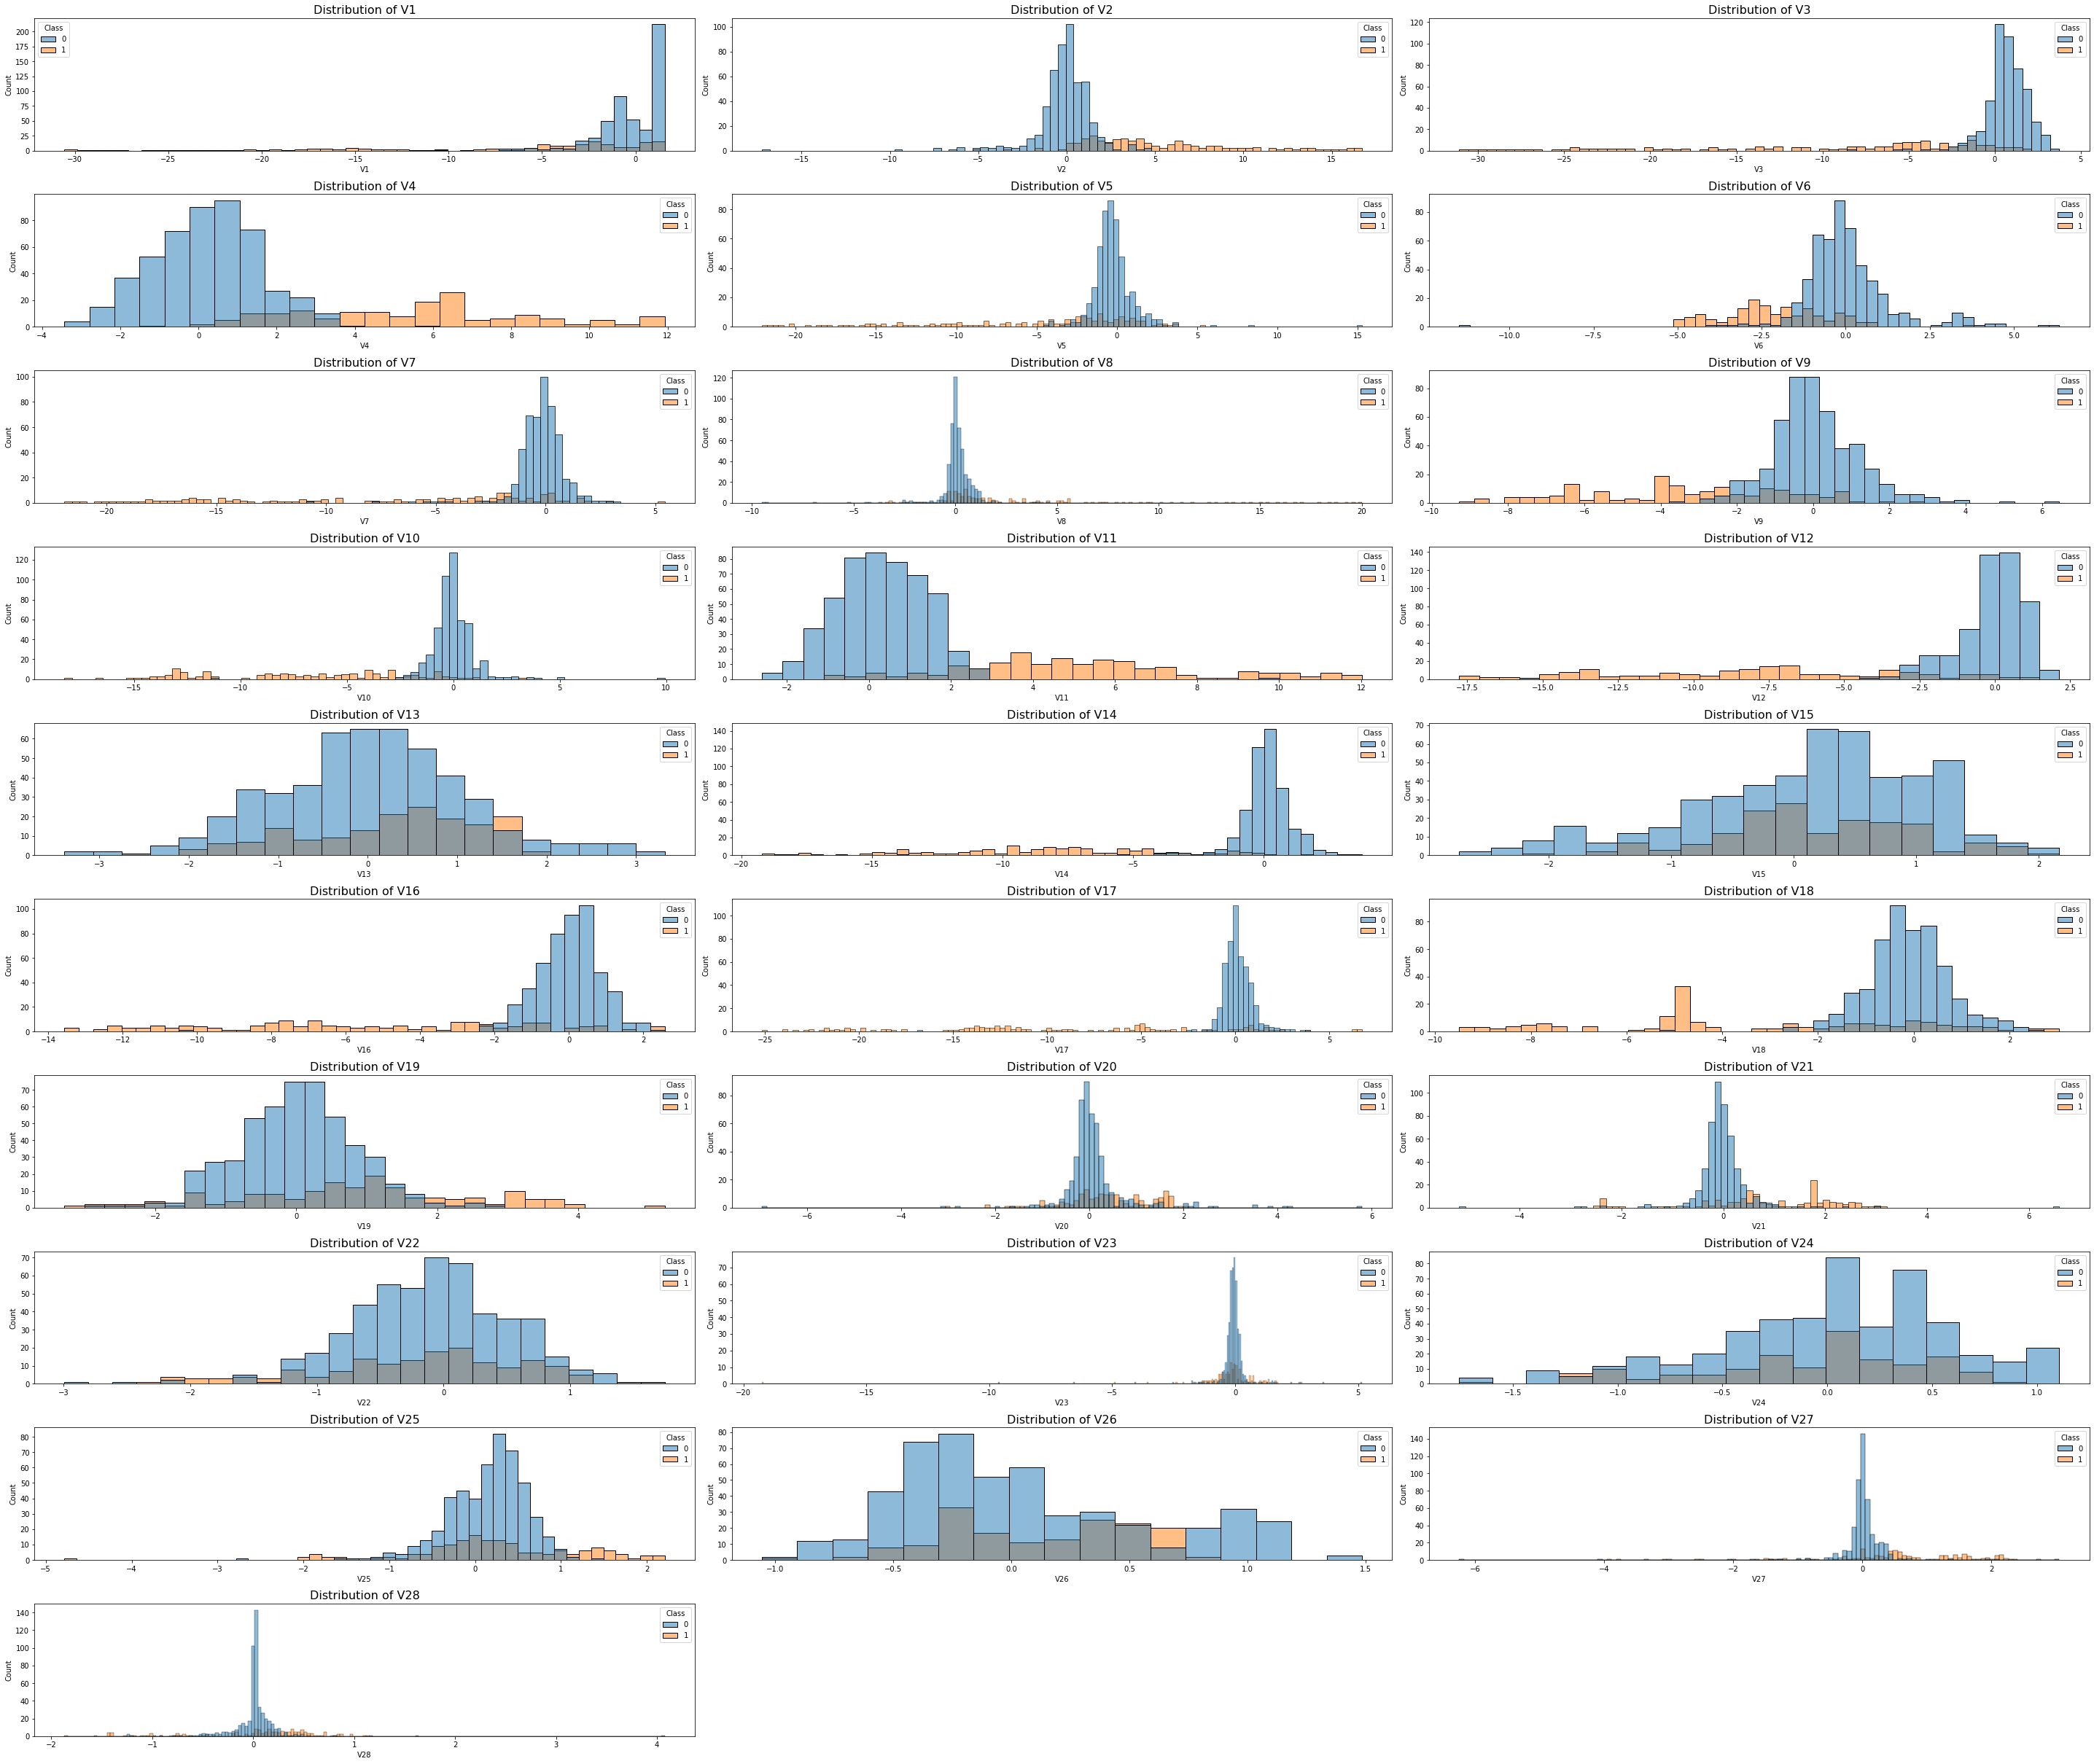

In [ ]:
%%time
plt.figure(figsize = (40,40))
# Plotting histogram of each individual columns to check for outliers
num = 1
for cols in ['V1','V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']:
    plt.subplot(12,3,num)
    sns.histplot(data=df_new_random_1, x=cols, hue='Class') 
    plt.title(f'Distribution of {cols}', size = 16)
    num +=1
plt.tight_layout();


In [ ]:
df_new_random_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,664.0,37586.707831,16958.590085,46.000000,27682.250000,40120.000000,49686.000000,65085.000000
V1,664.0,-1.900347,5.269473,-30.552380,-1.915181,-0.481671,1.092918,1.562782
V2,664.0,1.127308,3.422876,-17.246125,-0.432820,0.304631,1.497402,16.713389
V3,664.0,-1.812922,6.247461,-31.103685,-1.166097,0.369202,1.199144,3.757584
V4,664.0,1.538212,2.952411,-3.424726,-0.365287,0.754624,2.468366,11.927512
V5,664.0,-1.471753,4.010409,-22.105532,-1.328354,-0.526574,0.150230,15.254313
V6,664.0,-0.504731,1.679328,-11.495788,-1.136331,-0.333798,0.260456,6.355986
V7,664.0,-1.971130,4.722839,-21.922811,-1.232409,-0.347480,0.230751,5.431271
V8,664.0,0.878103,3.159848,-9.518165,-0.097990,0.123749,0.640354,20.007208
V9,664.0,-0.785281,2.190700,-9.283925,-1.311302,-0.295770,0.420021,6.453748


In [ ]:
#test_df_1=df[df.Class==1]
#test_df_0=test_2.sample(n=5000)

In [ ]:
#test_com=[test_df_1,test_df_0]
#test_combine=pd.concat(test_com)
#test_combine

In [ ]:
#df=df.dropna()

In [ ]:
df.value_counts()

Time      V1          V2          V3         V4         V5         V6         V7          V8          V9         V10        V11        V12        V13        V14        V15        V16        V17        V18        V19        V20        V21         V22        V23        V24        V25        V26        V27        V28        Amount  Class
163152.0  -1.196037    1.585949    2.883976   3.378471   1.511706   3.717077   0.585362   -0.156001    0.122648   4.217934   1.385525  -0.709405  -0.256168  -1.564352   1.693218  -0.785210  -0.228008  -0.412833   0.234834   1.375790  -0.370294    0.524395  -0.355170  -0.869790  -0.133198   0.327804  -0.035702  -0.858197  7.56    0        18
          -1.203617    1.574009    2.889277   3.381404   1.538663   3.698747   0.560211   -0.150911    0.124136   4.220998   1.384569  -0.706897  -0.256274  -1.562583   1.692915  -0.787338  -0.226776  -0.412354   0.234322   1.385597  -0.366727    0.522223  -0.357329  -0.870174  -0.134166   0.327019  -0.042648  -0.85526

In [ ]:
#df['V22']=df['V22'].astype(object).astype(float)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5492 entries, 541 to 249497
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5492 non-null   float64
 1   V1      5492 non-null   float64
 2   V2      5492 non-null   float64
 3   V3      5492 non-null   float64
 4   V4      5492 non-null   float64
 5   V5      5492 non-null   float64
 6   V6      5492 non-null   float64
 7   V7      5492 non-null   float64
 8   V8      5492 non-null   float64
 9   V9      5492 non-null   float64
 10  V10     5492 non-null   float64
 11  V11     5492 non-null   float64
 12  V12     5492 non-null   float64
 13  V13     5492 non-null   float64
 14  V14     5492 non-null   float64
 15  V15     5492 non-null   float64
 16  V16     5492 non-null   float64
 17  V17     5492 non-null   float64
 18  V18     5492 non-null   float64
 19  V19     5492 non-null   float64
 20  V20     5492 non-null   float64
 21  V21     5492 non-null   float64
 

CPU times: user 25.1 s, sys: 456 ms, total: 25.6 s
Wall time: 25.3 s


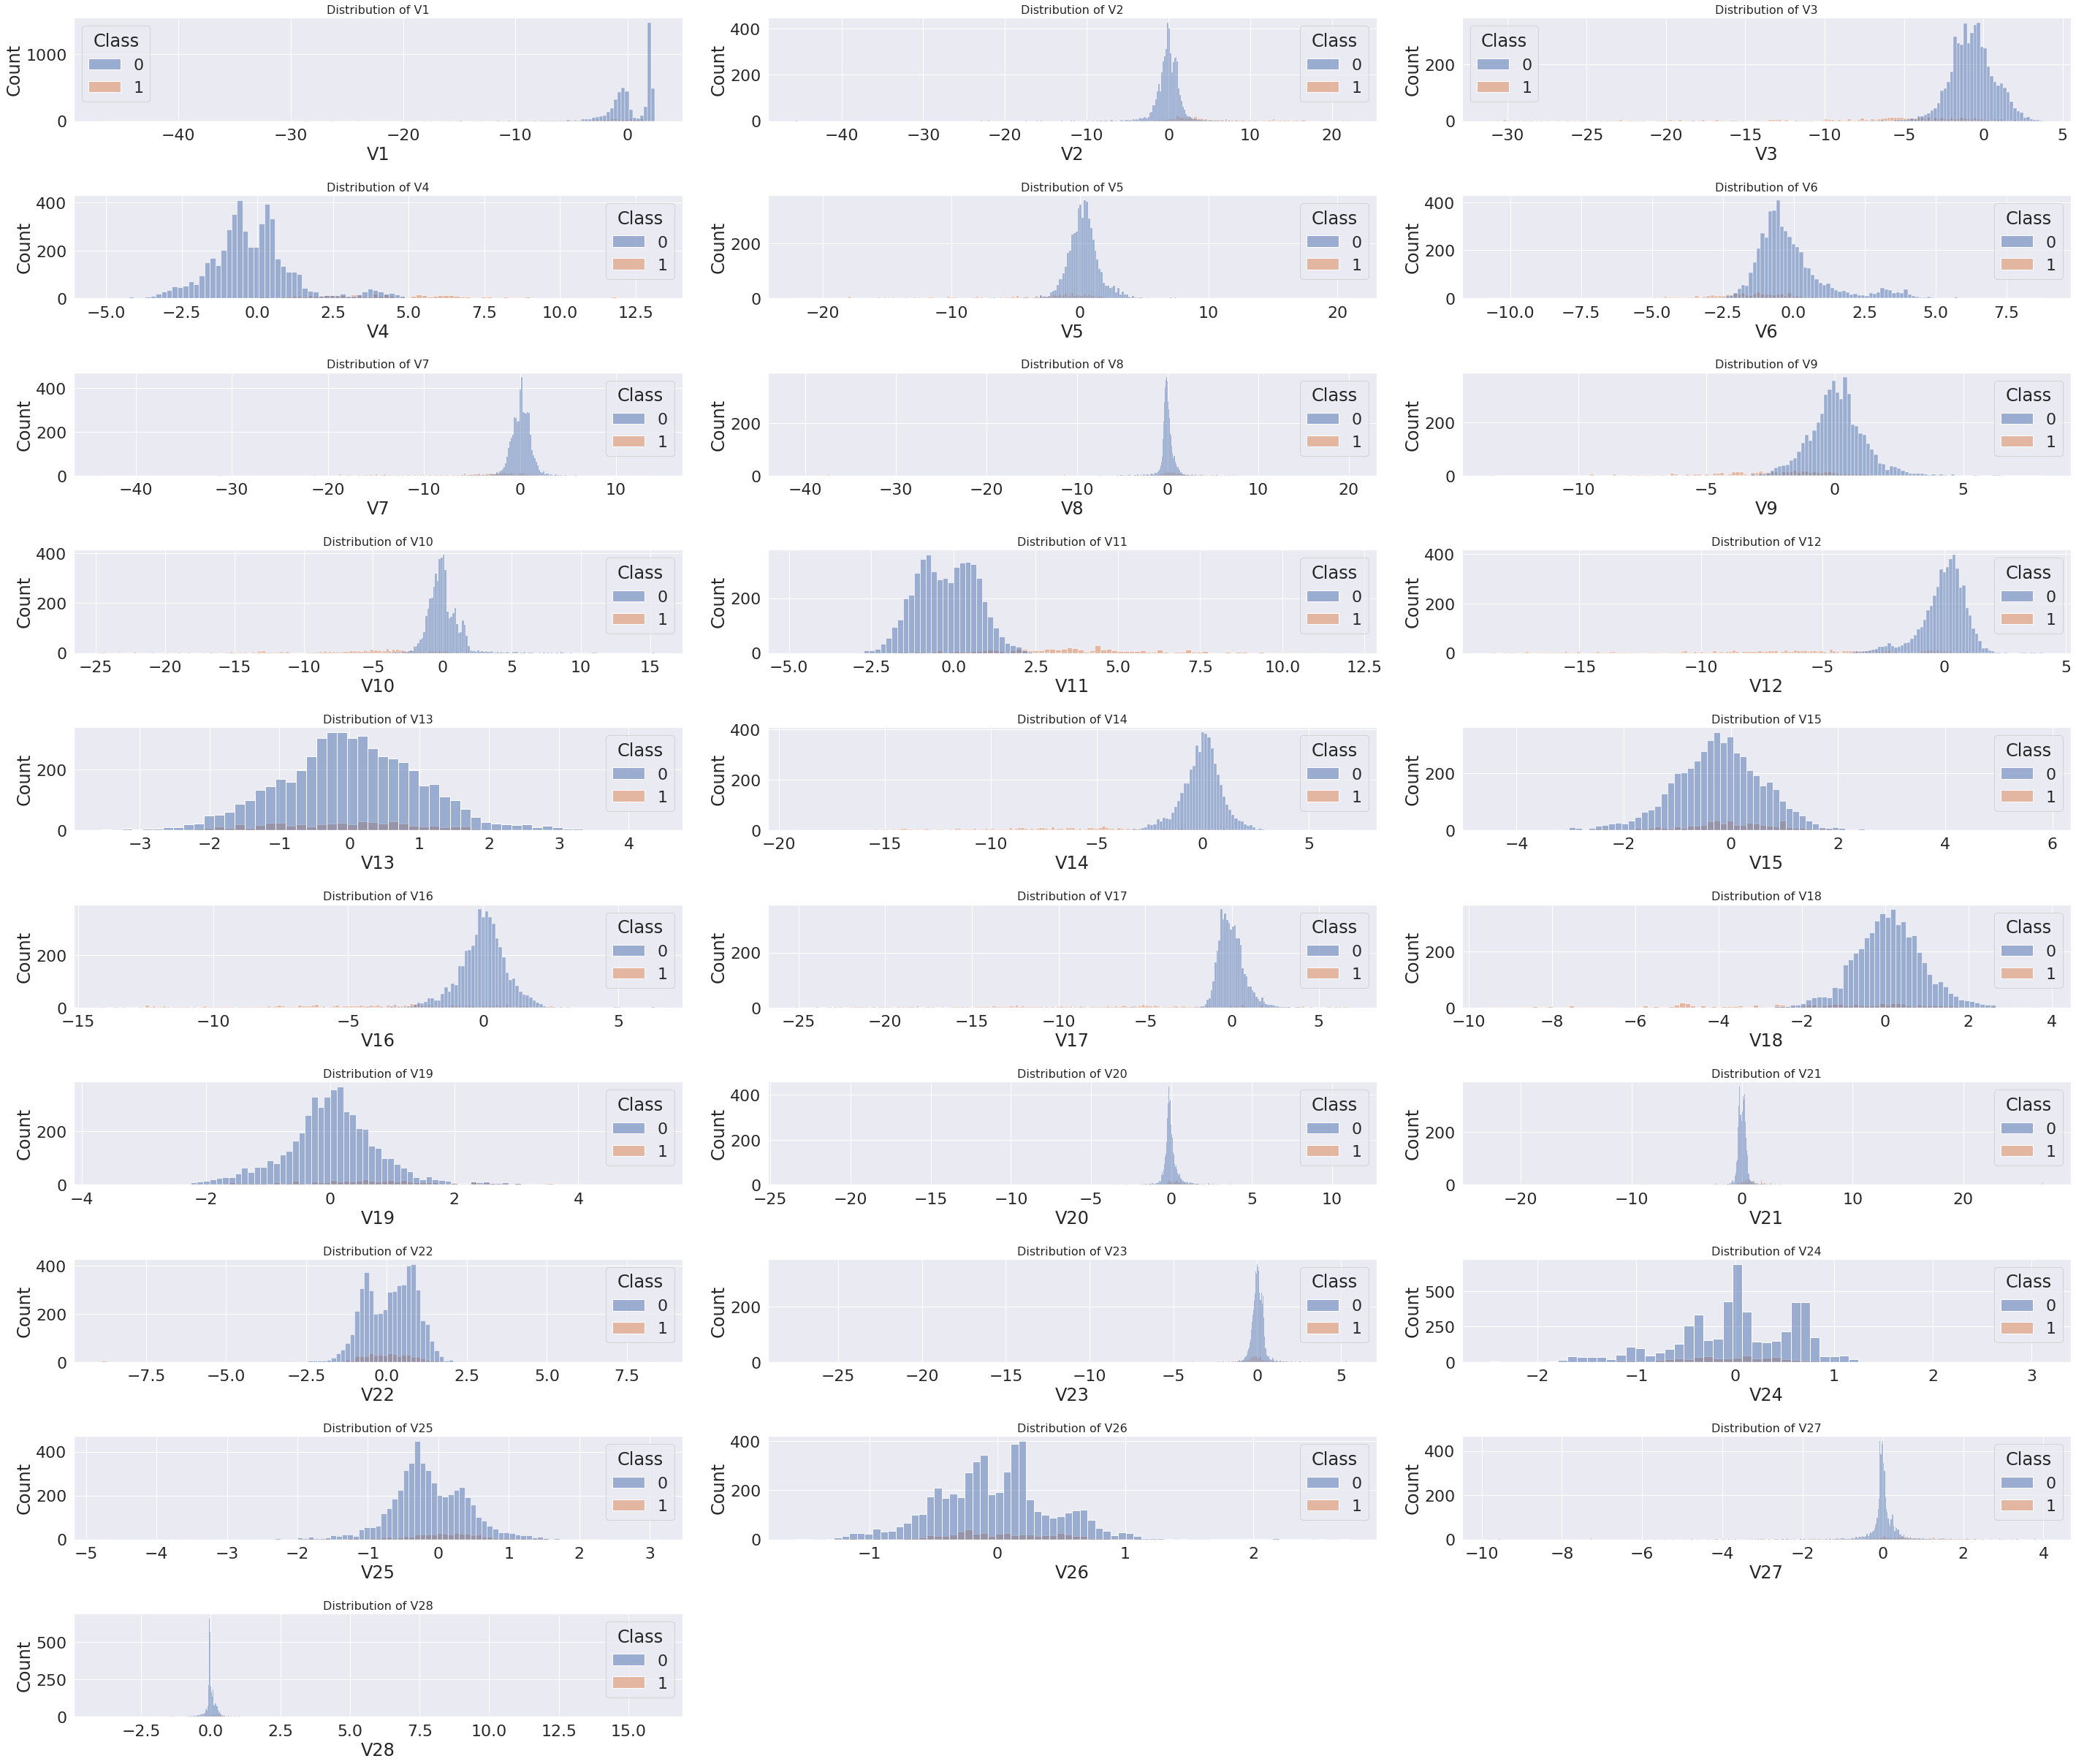

In [ ]:
%%time
plt.figure(figsize = (40,40))
# Plotting histogram of each individual columns to check for outliers
num = 1
for cols in ['V1','V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']:
    plt.subplot(12,3,num)
    sns.histplot(data=df_new, x=cols, hue='Class') 
    plt.title(f'Distribution of {cols}', size = 16)
    num +=1
plt.tight_layout();


CPU times: user 3min 5s, sys: 4.83 s, total: 3min 10s
Wall time: 3min 8s


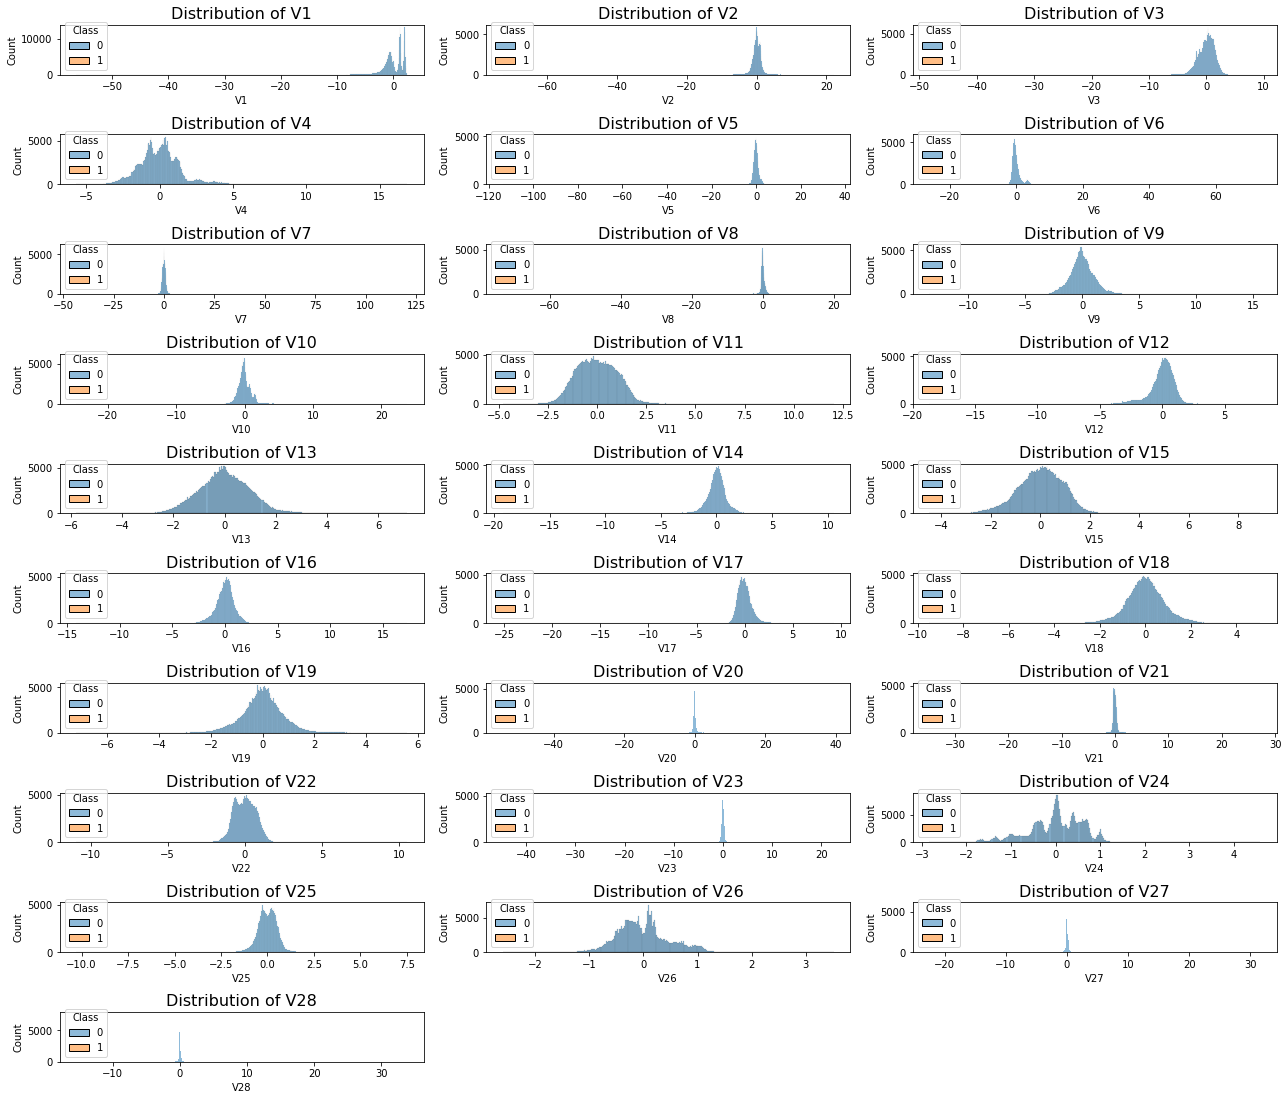

In [ ]:
%%time
plt.figure(figsize = (18,18))
# Plotting histogram of each individual columns to check for outliers
num = 1
for cols in ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']:
    plt.subplot(12,3,num)
    sns.histplot(data=df, x=cols, hue='Class') 
    plt.title(f'Distribution of {cols}', size = 16)
    num +=1
plt.tight_layout();


In [ ]:
z=np.abs(stats.zscore(df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']]))

In [ ]:
test=(z<3).all(axis=1)
new_df=df[test]

In [ ]:
df.shape

(284807, 31)

In [ ]:
new_df.shape

(248331, 31)

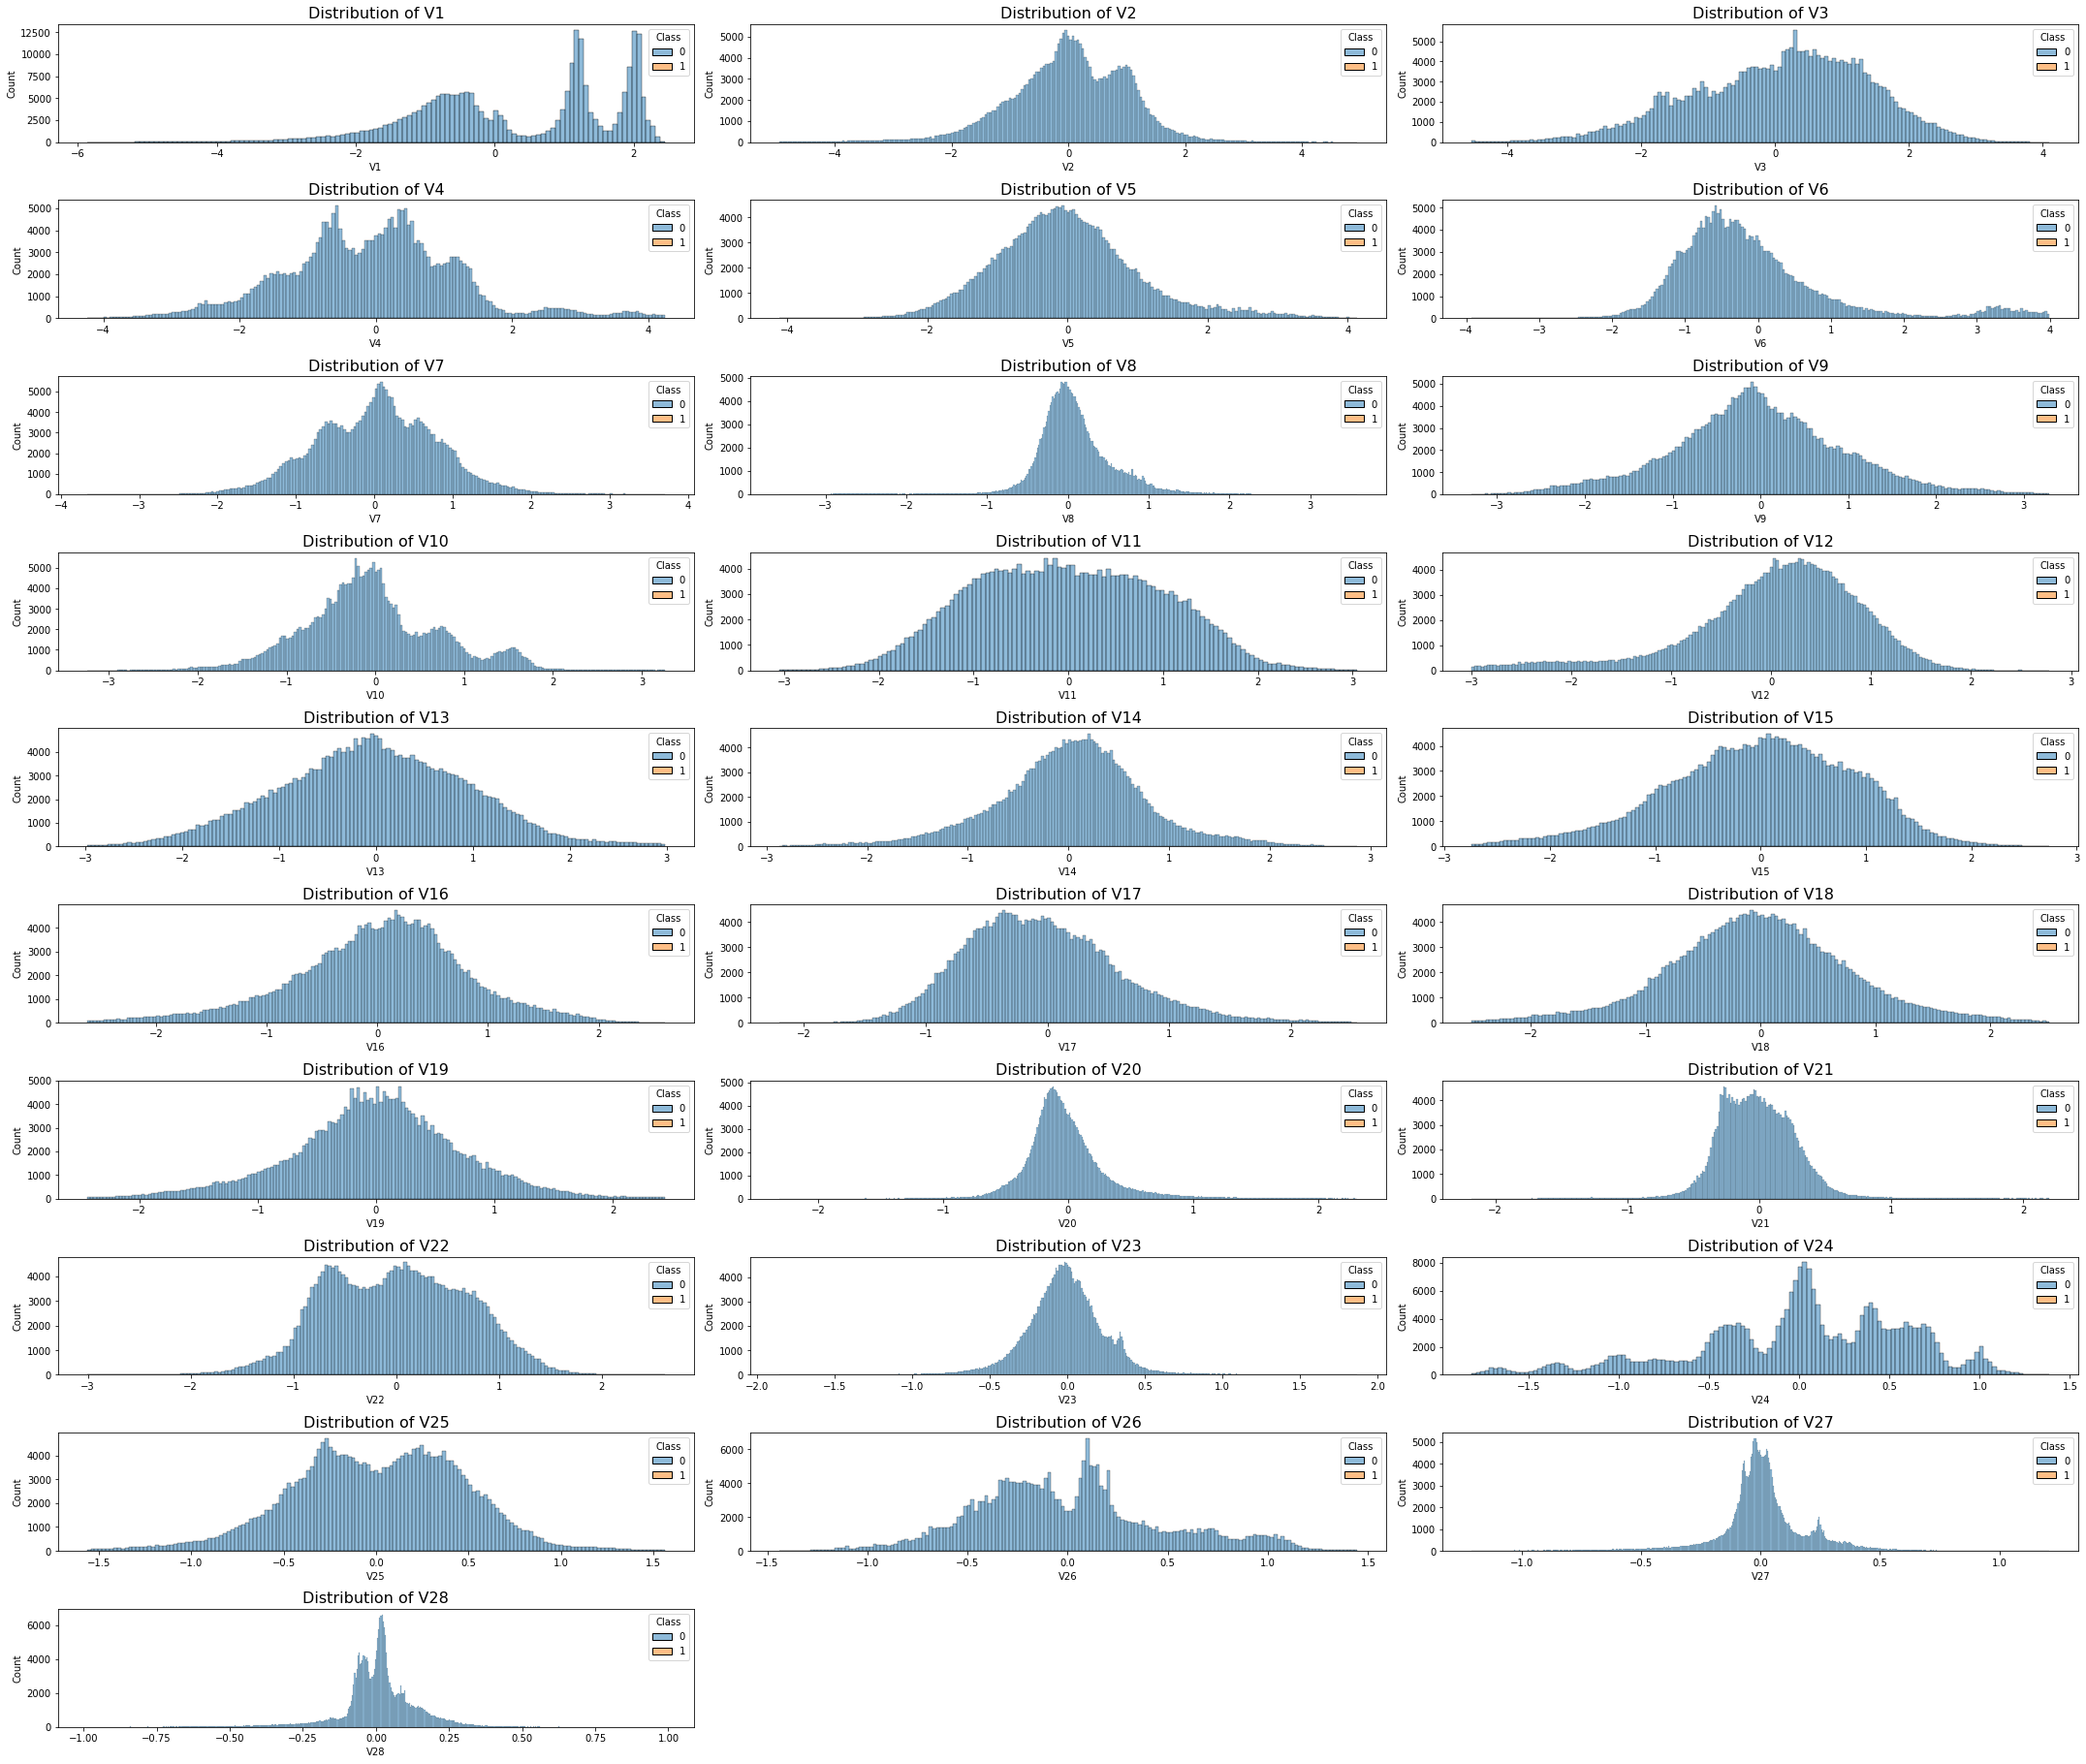

In [ ]:
plt.figure(figsize = (30,30))
# Plotting histogram of each individual columns to check for outliers
num = 1
for cols in ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']:
    plt.subplot(12,3,num)
    sns.histplot(data=new_df, x=cols, hue='Class') 
    plt.title(f'Distribution of {cols}', size = 16)
    num +=1
plt.tight_layout();


CPU times: user 221 ms, sys: 23.3 ms, total: 244 ms
Wall time: 244 ms


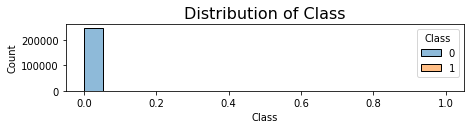

In [ ]:
%%time 
plt.figure(figsize = (18,18))

num = 1
for cols in ['Class']:
    plt.subplot(12,3,num)
    sns.histplot(data=new_df, x=cols, hue='Class') 
    plt.title(f'Distribution of {cols}', size = 16)
    num +=1
plt.tight_layout();


In [ ]:
new_df['Class'].value_counts()

0    248282
1        49
Name: Class, dtype: int64

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
df.Class.unique()

array([0, 1])

In [ ]:
#sns.pairplot(data=df,hue='Class')

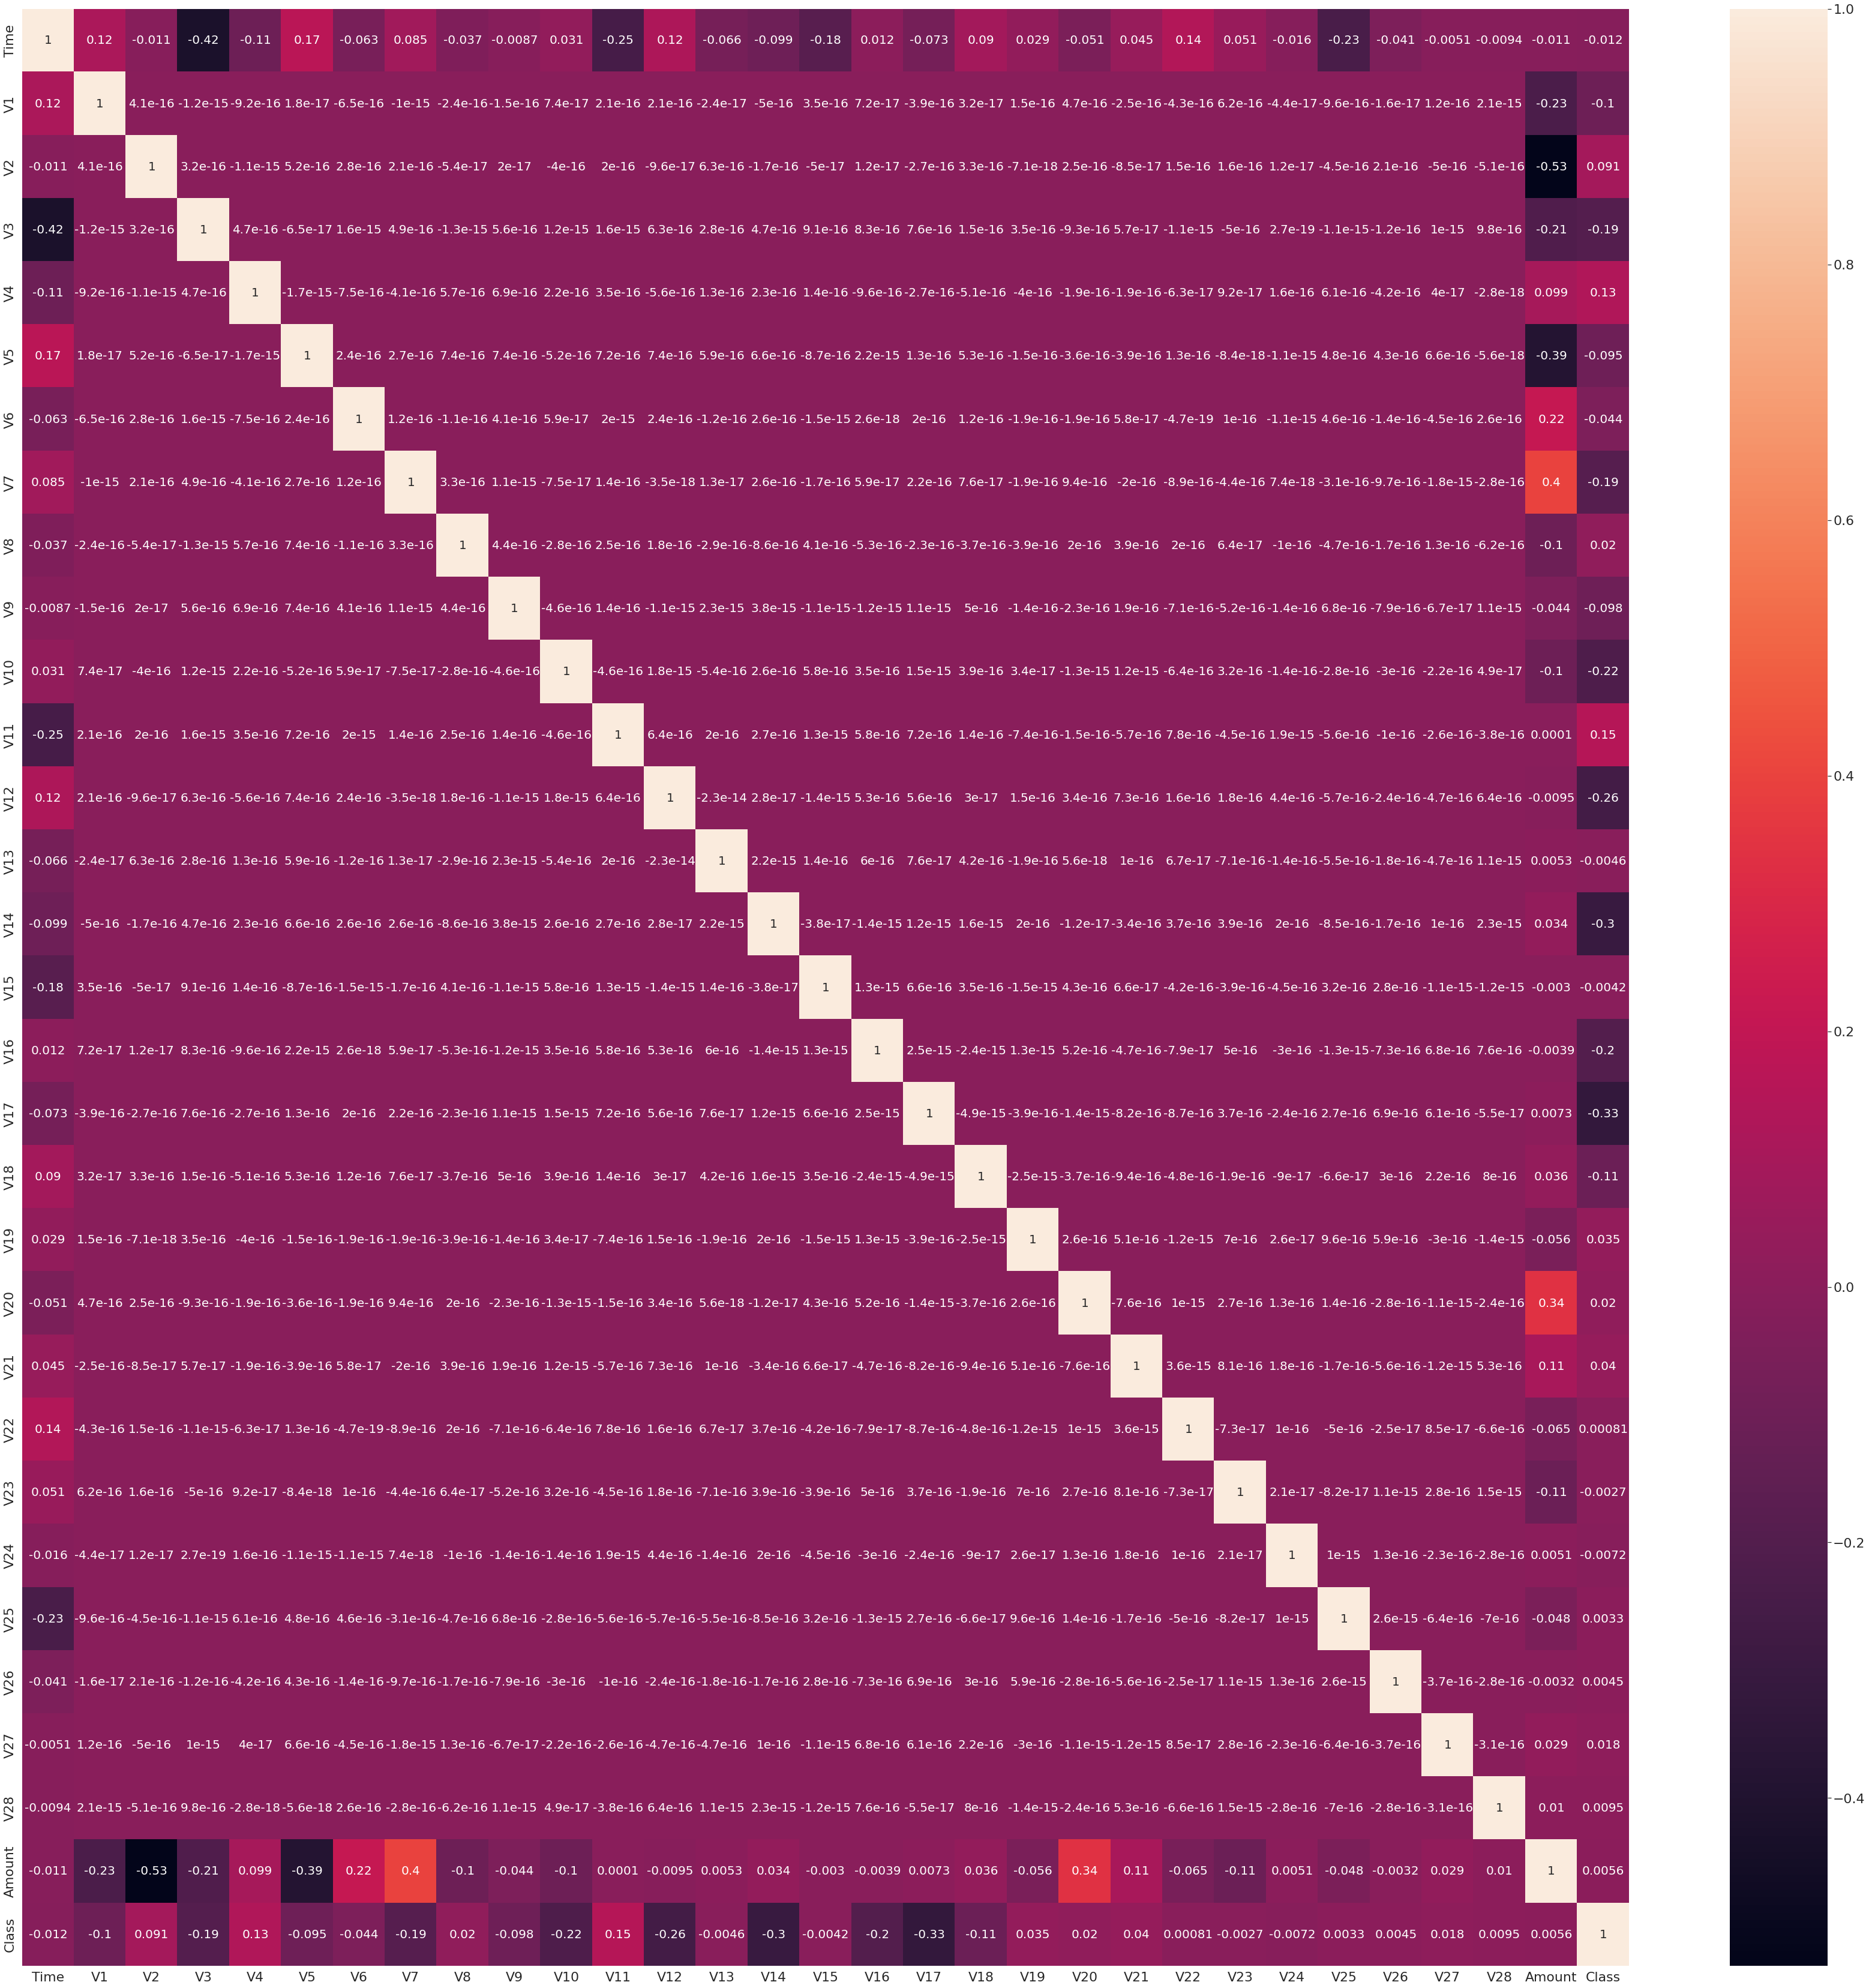

In [ ]:
plt.figure(figsize = (60,60))
sns.set(font_scale=2)
sns.heatmap(df.corr(),annot=True,annot_kws={"size":20},fmt='.2g')

In [ ]:
df.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [ ]:
df_new_random_1.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V4        0.770564
V11       0.764177
V2        0.656326
V8        0.457165
V21       0.414859
V27       0.320565
V19       0.310937
V20       0.171888
V13       0.094713
V26       0.069840
V25       0.057876
V28       0.023344
V15       0.021342
Amount   -0.016498
V22      -0.065940
V23      -0.070174
V24      -0.083729
Time     -0.295676
V5       -0.531554
V6       -0.556308
V1       -0.557131
V18      -0.628139
V7       -0.657035
V9       -0.664760
V3       -0.701940
V17      -0.711398
V16      -0.732009
V10      -0.772345
V12      -0.803226
V14      -0.828792
Name: Class, dtype: float64

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
X=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
y=['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y],test_size=0.2, random_state = 42)

In [ ]:
y_test.Class.value_counts()

0    56864
1       98
Name: Class, dtype: int64

In [ ]:
y_train.Class.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [ ]:
X=df_new_random_1[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']]
y=df_new_random_1['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 42)

In [ ]:
df_new_random_1['Class'].value_counts()

0    500
1    164
Name: Class, dtype: int64

In [ ]:
df_new_random_1.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V4        0.770564
V11       0.764177
V2        0.656326
V8        0.457165
V21       0.414859
V27       0.320565
V19       0.310937
V20       0.171888
V13       0.094713
V26       0.069840
V25       0.057876
V28       0.023344
V15       0.021342
Amount   -0.016498
V22      -0.065940
V23      -0.070174
V24      -0.083729
Time     -0.295676
V5       -0.531554
V6       -0.556308
V1       -0.557131
V18      -0.628139
V7       -0.657035
V9       -0.664760
V3       -0.701940
V17      -0.711398
V16      -0.732009
V10      -0.772345
V12      -0.803226
V14      -0.828792
Name: Class, dtype: float64

In [ ]:
def feature_selection(mod):
  ## Use Forward Feature Selection to pick a good model

  # start with no predictors
  included = []
  # keep track of model and parameters
  best = {'feature': '', 'r2': 0, 'a_r2': 0}
  # create a model object to hold the modelling parameters
  model = mod
  # get the number of cases in the test data
  n = X_test.shape[0]

  r2_list = []
  adjusted_r2_list = []
  show_steps = True

  ## ANSWER
  while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        #included is a list, new column is also a list, when we add them together they combine into a bigger list
        fit = model.fit(X_train[included+[new_column]],y_train) # fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression)
        r2 = model.score(X_test[included+[new_column]],y_test) # calculate the score (using test score)
        
        
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1-((1-r2)*((n-1))/(n-k-1)) # calculate the Adjusted R^2
        
        
        
        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            r2_list.append(model.score(X_test[included+[new_column]],y_test))
            adjusted_r2_list.append(model.score(X_train[included+[new_column]],y_train))
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        break

  print('')
  print('Resulting features:')
  print(', '.join(included))


In [ ]:
#V14, V22

In [ ]:
RFC=RandomForestClassifier(random_state=42)

In [ ]:
feature_selection(RFC)


(Step) Excluded = V6, V16, V27, V14, V11, V4, V10, V12, V8, V13, V25, V3, V5, V2, V26, V21, V1, V22, V15, V17, V23, V24, V7, V9, V19, V20, V28, V18
(Step) Trying V6...
(Step) - Features = V6
(Step) - Adjusted R^2: This = 0.848; Best = 0.000
(Step) - New Best!   : Feature = V6; R^2 = 0.850; Adjusted R^2 = 0.848
(Step) Trying V16...
(Step) - Features = V16
(Step) - Adjusted R^2: This = 0.886; Best = 0.848
(Step) - New Best!   : Feature = V16; R^2 = 0.887; Adjusted R^2 = 0.886
(Step) Trying V27...
(Step) - Features = V27
(Step) - Adjusted R^2: This = 0.856; Best = 0.886
(Step) Trying V14...
(Step) - Features = V14
(Step) - Adjusted R^2: This = 0.947; Best = 0.886
(Step) - New Best!   : Feature = V14; R^2 = 0.947; Adjusted R^2 = 0.947
(Step) Trying V11...
(Step) - Features = V11
(Step) - Adjusted R^2: This = 0.932; Best = 0.947
(Step) Trying V4...
(Step) - Features = V4
(Step) - Adjusted R^2: This = 0.871; Best = 0.947
(Step) Trying V10...
(Step) - Features = V10
(Step) - Adjusted R^2: Th

In [ ]:
X_after=df_new_random_1[['V14','V22']]
y_after=df_new_random_1['Class']
X_train_after, X_test_after, y_train_after, y_test_after = train_test_split(X_after, y_after,test_size=0.2, random_state = 42)


In [ ]:
RFC.fit(X_train_after,y_train_after.values.ravel())
RFC.score(X_test_after,y_test_after)

0.9774436090225563

In [ ]:
#params= {
#    'n_estimators':range(100, 150, 5),
#    'criterion': ['gini','entropy'],
#    'max_depth': range(3,6),
#    'class_weight':['balanced','balanced_subsample',None]
#}

#best_model_RFC=GridSearchCV(RFC_after,params,scoring='f1')


In [ ]:

#best_model_RFC.fit(X_train_after,y_train_after.values.ravel())

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 6),
                         'n_estimators': range(100, 150, 5)},
             scoring='f1')

In [ ]:
#best_model_RFC.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=135,
                       random_state=42)

In [ ]:
params2= {
    'n_estimators':range(100, 140, 1),
    'criterion': ['gini','entropy'],
    'max_depth': range(4,6),
    'class_weight':['balanced','balanced_subsample',None]
}

best_model_RFC_2=GridSearchCV(RFC,params2,scoring='f1')


In [ ]:

best_model_RFC_2.fit(X_train_after,y_train_after.values.ravel())

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 6),
                         'n_estimators': range(100, 140)},
             scoring='f1')

In [ ]:
best_model_RFC_2.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=116,
                       random_state=42)

In [ ]:
#best_model_RFC_Grid=RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=135,
 #                      random_state=42)

In [ ]:

#best_model_RFC_Grid.fit(X_train_after,y_train_after.values.ravel())

RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=135,
                       random_state=42)

In [ ]:
#best_model_RFC_Grid.score(X_train_after,y_train_after)

0.9548022598870056

In [ ]:
#best_model_RFC_Grid.score(X_test_after,y_test_after)

0.9473684210526315

In [ ]:
best_model_RFC_Grid_2=RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=116,
                       random_state=42)

In [ ]:

best_model_RFC_Grid_2.fit(X_train_after,y_train_after.values.ravel())

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=116,
                       random_state=42)

In [ ]:
best_model_RFC_Grid_2.score(X_train_after,y_train_after)

0.9698681732580038

In [ ]:
best_model_RFC_Grid_2.score(X_test_after,y_test_after)

0.9624060150375939

In [ ]:
X=df_new_random_1[['V14','V22']]
y=df_new_random_1['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 42)

training for model: RandomForestClassifier


Accuracy Score for RandomForestClassifier:
96.2406015037594%
Misclassification Score for RandomForestClassifier:
3.7593984962406015%
Precision Score for RandomForestClassifier:
90.625%
Sensitivity Score for RandomForestClassifier:
93.54838709677419%
Specificity Score for RandomForestClassifier:
97.05882352941177%


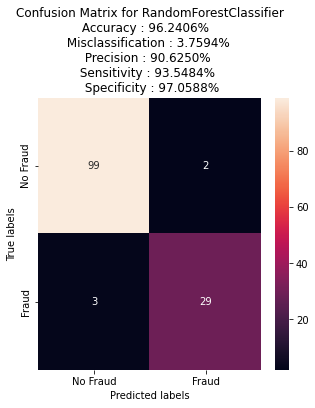

In [ ]:
# training test data for Random forest

cm(best_model_RFC_Grid_2)

In [ ]:
X=df[['V14','V22']]
y=df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 42)

training for model: RandomForestClassifier


Accuracy Score for RandomForestClassifier:
96.81366525051789%
Misclassification Score for RandomForestClassifier:
3.1863347494821106%
Precision Score for RandomForestClassifier:
85.71428571428571%
Sensitivity Score for RandomForestClassifier:
4.456233421750663%
Specificity Score for RandomForestClassifier:
99.97458104108793%


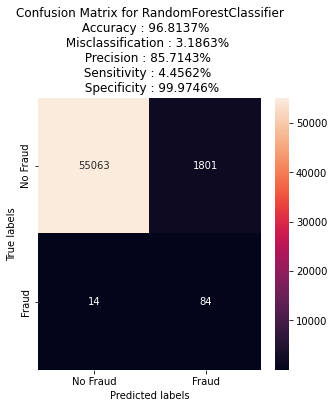

In [ ]:
# partialtest data for Random forest

cm(best_model_RFC_Grid_2)

In [ ]:
X=df[['V14','V22']]
y=df['Class']

training for model: RandomForestClassifier


Accuracy Score for RandomForestClassifier:
96.74551538410222%
Misclassification Score for RandomForestClassifier:
3.254484615897783%
Precision Score for RandomForestClassifier:
87.39837398373984%
Sensitivity Score for RandomForestClassifier:
4.461969492580678%
Specificity Score for RandomForestClassifier:
99.97746847403424%


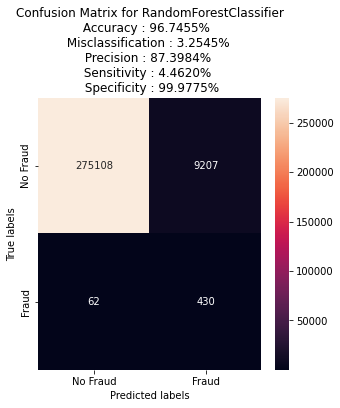

In [ ]:
cm_full_data(best_model_RFC_Grid_2)

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)
test_test = cross_val_predict(best_model_RFC_Grid_2, X_train, y_train, cv=cv)
print('Random Forest ROC AUC Score: ', roc_auc_score(y_train, test_test))


Random Forest ROC AUC Score:  0.9218215994531783


In [ ]:
RFC_roc=roc_auc_score(y_train, test_test)
RFC_roc

0.9218215994531783

In [ ]:
RFC_fpr, RFC_tpr, RFC_thresold = roc_curve(y_train, test_test)

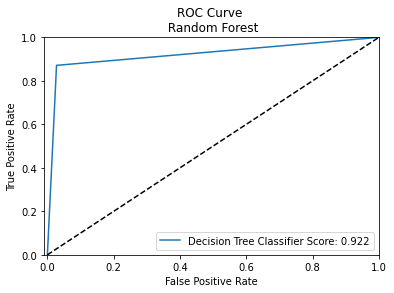

In [ ]:
plt.figure()
plt.title('ROC Curve \n Random Forest')
plt.plot(RFC_fpr, RFC_tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.annotate('Minimum ROC Score of 50% \n', xy=(0.5, 0.5), xytext=(0.6, 0.3))
plt.legend([f"Decision Tree Classifier Score: {RFC_roc:.3f}"])

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
BRFC = BalancedRandomForestClassifier()

In [ ]:
BRFC.fit(X_train,y_train)

BalancedRandomForestClassifier()

In [ ]:
test_test = cross_val_predict(BRFC, X_train, y_train, cv=5)
print('B Random Forest ROC AUC Score: ', roc_auc_score(y_train, test_test))

B Random Forest ROC AUC Score:  0.9345238095238094


Text(0.6, 0.3, 'Minimum ROC Score of 50% \n')

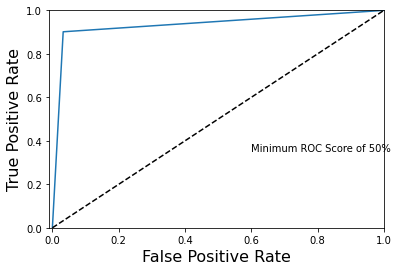

In [ ]:
plt.plot(test_fpr, test_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, test_test)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n', xy=(0.5, 0.5), xytext=(0.6, 0.3))

Decision Tree

In [ ]:
X=df_new_random_1[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']]
y=df_new_random_1['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 42)

In [ ]:
Dec_tree=DecisionTreeClassifier(random_state=42)

In [ ]:
feature_selection(Dec_tree)


(Step) Excluded = V16, V28, V15, V3, V18, V9, V13, V24, V20, V22, V14, V17, V1, V4, V26, V19, V11, V7, V25, V23, V10, V2, V12, V8, V21, V27, V6, V5
(Step) Trying V16...
(Step) - Features = V16
(Step) - Adjusted R^2: This = 0.886; Best = 0.000
(Step) - New Best!   : Feature = V16; R^2 = 0.887; Adjusted R^2 = 0.886
(Step) Trying V28...
(Step) - Features = V28
(Step) - Adjusted R^2: This = 0.780; Best = 0.886
(Step) Trying V15...
(Step) - Features = V15
(Step) - Adjusted R^2: This = 0.636; Best = 0.886
(Step) Trying V3...
(Step) - Features = V3
(Step) - Adjusted R^2: This = 0.833; Best = 0.886
(Step) Trying V18...
(Step) - Features = V18
(Step) - Adjusted R^2: This = 0.833; Best = 0.886
(Step) Trying V9...
(Step) - Features = V9
(Step) - Adjusted R^2: This = 0.826; Best = 0.886
(Step) Trying V13...
(Step) - Features = V13
(Step) - Adjusted R^2: This = 0.667; Best = 0.886
(Step) Trying V24...
(Step) - Features = V24
(Step) - Adjusted R^2: This = 0.651; Best = 0.886
(Step) Trying V20...
(S

In [ ]:
X=df_new_random_1[['V14', 'V16','V7','V11']]
y=df_new_random_1['Class']


X_train_Dec_tree, X_test_Dec_tree, y_train_Dec_tree, y_test_Dec_tree = train_test_split(X, y,test_size=0.2, random_state = 42)


In [ ]:

Dec_tree.fit(X_train_Dec_tree,y_train_Dec_tree)
Dec_tree.score(X_test_Dec_tree,y_test_Dec_tree)

0.9849624060150376

In [ ]:
tree_params = {
    'max_depth':range(1,20,1),
    'min_samples_split': range(10,150,10)
}

params_tree=DecisionTreeClassifier(random_state=42)
Dec_tree_model=GridSearchCV(params_tree,tree_params)

In [ ]:
Dec_tree_model.fit(X_train_Dec_tree,y_train_Dec_tree)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(1, 20),
                         'min_samples_split': range(10, 150, 10)})

In [ ]:
Dec_tree_model.best_params_

{'max_depth': 3, 'min_samples_split': 10}

In [ ]:
Dec_tree_model_Grid=DecisionTreeClassifier(max_depth=3,min_samples_split=10,random_state=42)

In [ ]:
Dec_tree_model_Grid.fit(X_train_Dec_tree,y_train_Dec_tree)

DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=42)

In [ ]:
Dec_tree_model_Grid.score(X_test_Dec_tree,y_test_Dec_tree)

0.9699248120300752

In [ ]:
X=['V14', 'V16','V7','V11']

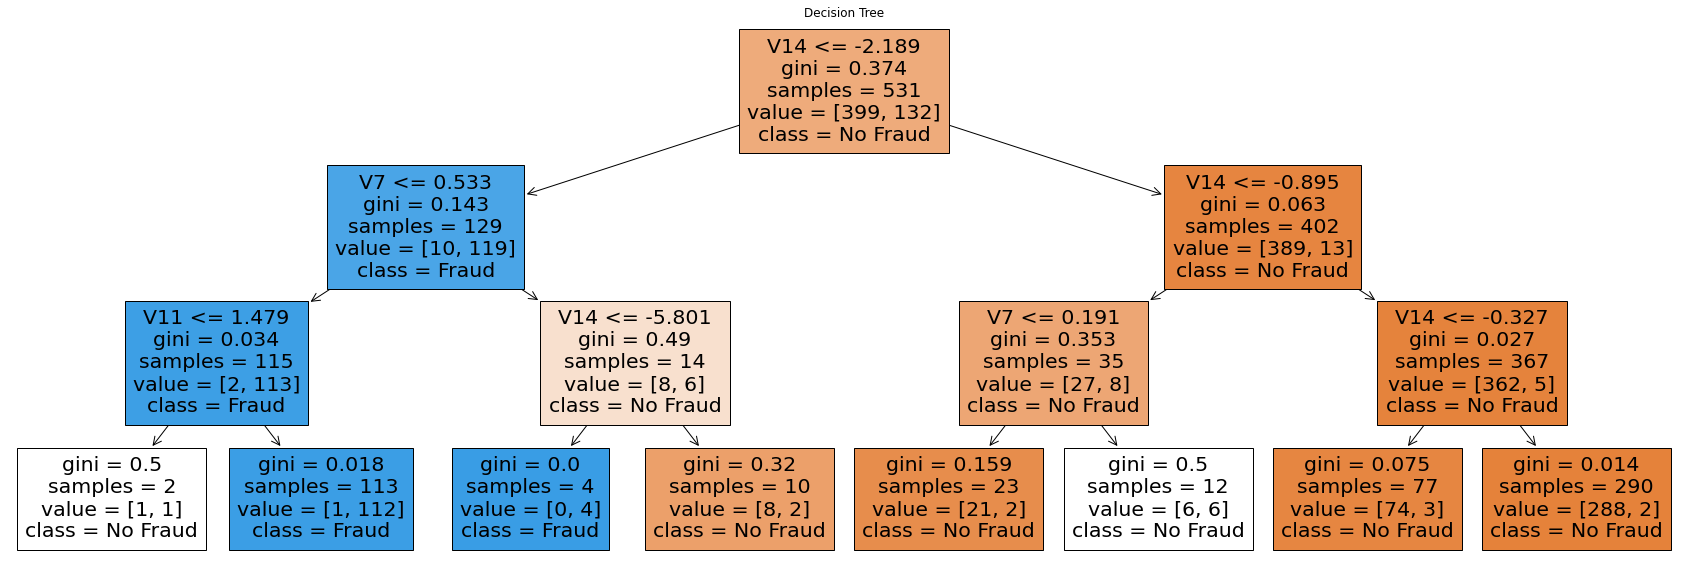

Accuracy: 0.9699


In [ ]:
plt.figure(figsize=(30,10))
tree.plot_tree(Dec_tree_model_Grid,feature_names=X,class_names=['No Fraud','Fraud'],filled=True)
plt.title('Decision Tree')
plt.show()
print('Accuracy: %.4f' % accuracy_score(y_test_Dec_tree, Dec_tree_model_Grid.predict(X_test_Dec_tree)))

In [ ]:
X=df_new_random_1[['V14', 'V16','V7','V11']]
y=df_new_random_1['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 42)


training for model: DecisionTreeClassifier


Accuracy Score for DecisionTreeClassifier:
96.99248120300751%
Misclassification Score for DecisionTreeClassifier:
3.007518796992481%
Precision Score for DecisionTreeClassifier:
87.5%
Sensitivity Score for DecisionTreeClassifier:
100.0%
Specificity Score for DecisionTreeClassifier:
96.19047619047619%


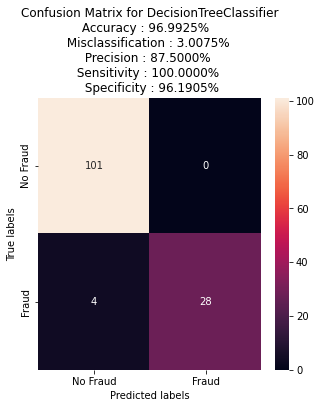

In [ ]:
# train test smaller data using Dec tree

cm(Dec_tree_model_Grid)

Actual data for model: DecisionTreeClassifier


Accuracy Score for DecisionTreeClassifier:
100.0%
Misclassification Score for DecisionTreeClassifier:
0.0%
Precision Score for DecisionTreeClassifier:
100.0%
Sensitivity Score for DecisionTreeClassifier:
100.0%
Specificity Score for DecisionTreeClassifier:
100.0%


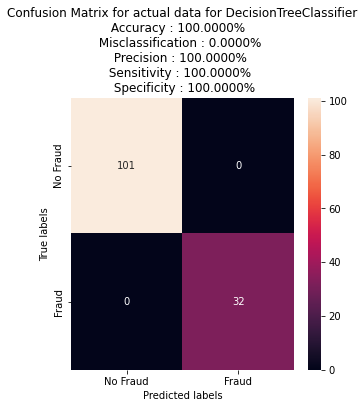

In [ ]:
cm_actual(Dec_tree_model_Grid)

In [ ]:
X=df[['V14', 'V16','V7','V11']]
y=df['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 42)


training for model: DecisionTreeClassifier


Accuracy Score for DecisionTreeClassifier:
99.74193321863699%
Misclassification Score for DecisionTreeClassifier:
0.2580667813630139%
Precision Score for DecisionTreeClassifier:
75.51020408163265%
Sensitivity Score for DecisionTreeClassifier:
37.56345177664975%
Specificity Score for DecisionTreeClassifier:
99.95772042631903%


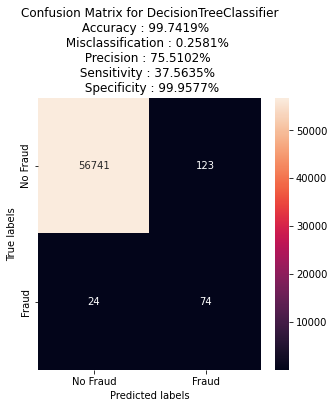

In [ ]:
# partial data using Dec tree


cm(Dec_tree_model_Grid)

In [ ]:
X=df_new_random_1[['V14', 'V16','V7','V11']]
y=df_new_random_1['Class']


X_train_Dec_tree, X_test_Dec_tree, y_train_Dec_tree, y_test_Dec_tree = train_test_split(X, y,test_size=0.2, random_state = 42)


In [ ]:
dec_tree_cross = cross_val_predict(Dec_tree_model_Grid, X_train, y_train, cv=cv)
print('Decision Tree ROC AUC Score: ', roc_auc_score(y_train, dec_tree_cross))

Decision Tree ROC AUC Score:  0.9180622009569377


In [ ]:
dec_roc=roc_auc_score(y_train, dec_tree_cross)
dec_roc


0.9180622009569377

In [ ]:
dec_tree_fpr, dec_tree_tpr, dec_tree_thresold = roc_curve(y_train, dec_tree_cross)


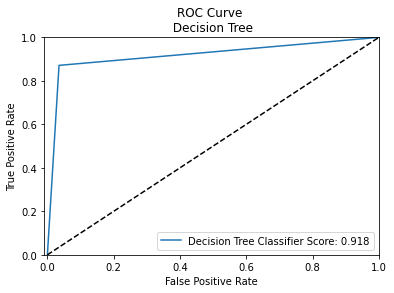

In [ ]:
plt.figure()
plt.title('ROC Curve \n Decision Tree')
plt.plot(dec_tree_fpr, dec_tree_tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.annotate('Minimum ROC Score of 50% \n', xy=(0.5, 0.5), xytext=(0.6, 0.3))
plt.legend([f"Decision Tree Classifier Score: {dec_roc:.3f}"])

Actual data for model: DecisionTreeClassifier


Accuracy Score for DecisionTreeClassifier:
100.0%
Misclassification Score for DecisionTreeClassifier:
0.0%
Precision Score for DecisionTreeClassifier:
100.0%
Sensitivity Score for DecisionTreeClassifier:
100.0%
Specificity Score for DecisionTreeClassifier:
100.0%


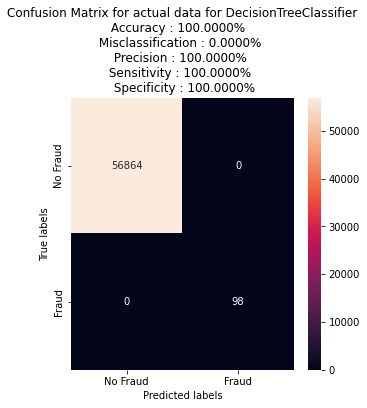

In [ ]:
cm_actual(Dec_tree_model_Grid)

In [ ]:
X=df[['V14', 'V16','V7','V11']]
y=df['Class']


training for model: DecisionTreeClassifier


Accuracy Score for DecisionTreeClassifier:
99.7461438798906%
Misclassification Score for DecisionTreeClassifier:
0.2538561201094074%
Precision Score for DecisionTreeClassifier:
76.6260162601626%
Sensitivity Score for DecisionTreeClassifier:
38.2741116751269%
Specificity Score for DecisionTreeClassifier:
99.95948164694774%


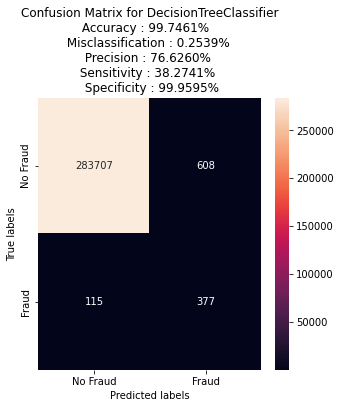

In [ ]:
# all data using Dec tree

cm_full_data(Dec_tree_model_Grid)

Full actual for model: DecisionTreeClassifier


Accuracy Score for DecisionTreeClassifier:
100.0%
Misclassification Score for DecisionTreeClassifier:
0.0%
Precision Score for DecisionTreeClassifier:
100.0%
Sensitivity Score for DecisionTreeClassifier:
100.0%
Specificity Score for DecisionTreeClassifier:
100.0%


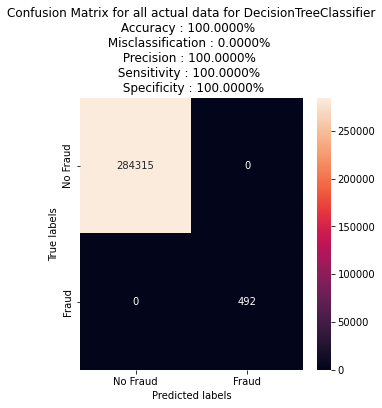

In [ ]:
cm_full_data_actual(Dec_tree_model_Grid)

In [ ]:
def cm_full_data(model_name):
  model=model_name
  model_name=model.__class__.__name__
    
  print(f"training for model: {model_name}\n\n")
    
  #model.fit(X_train,y_train.values.ravel())
  score = model.score(X,y)*100
  #print(f"Score for {model_name}:\n{score}")
  y_pred=model.predict(X)
  cm= confusion_matrix(y,y_pred)

  TN=cm[0][0]
  FN=cm[0][1]
  FP=cm[1][0]
  TP=cm[1][1]

  Accuracy = ( TP + TN ) / (TP+TN+FP+FN)  *100
  Misclassification = ( FP + FN ) / ( TP + TN + FP + FN ) *100
  Precision = TP / ( TP + FP ) *100
  Sensitivity = TP / ( TP + FN ) *100
  Specificity = TN / ( TN + FP ) *100

  print(f"Accuracy Score for {model_name}:\n{Accuracy}%")
  print(f"Misclassification Score for {model_name}:\n{Misclassification}%")
  print(f"Precision Score for {model_name}:\n{Precision}%")    
  print(f"Sensitivity Score for {model_name}:\n{Sensitivity}%")
  print(f"Specificity Score for {model_name}:\n{Specificity}%")

  plt.figure(figsize=(5,5))
  ax=plt.subplot()
  labels = ['No Fraud', 'Fraud']
  df_cm = pd.DataFrame(cm, index = labels,
                  columns = labels)
  sns.heatmap(df_cm,annot=True,fmt='g',ax=ax)
    
  ax.set_xlabel('Predicted labels');
  ax.set_ylabel('True labels');
  ax.set_title(f'Confusion Matrix for {model_name}\n Accuracy : {Accuracy:.4f}% \
  \n Misclassification : {Misclassification:.4f}%\
  \n Precision : {Precision:.4f}%\
  \n Sensitivity : {Sensitivity:.4f}%\
  \n Specificity : {Specificity:.4f}%')

In [ ]:
def cm_full_data_actual(model_name):
  model=model_name
  model_name=model.__class__.__name__
    
  print(f"Full actual for model: {model_name}\n\n")
    
  #model.fit(X_train,y_train.values.ravel())
  #score = model.score(X,y)*100
  #print(f"Score for {model_name}:\n{score}")
  #y_pred=model.predict(X)
  cm= confusion_matrix(y,y)

  TN=cm[0][0]
  FN=cm[0][1]
  FP=cm[1][0]
  TP=cm[1][1]

  Accuracy = ( TP + TN ) / (TP+TN+FP+FN)  *100
  Misclassification = ( FP + FN ) / ( TP + TN + FP + FN ) *100
  Precision = TP / ( TP + FP ) *100
  Sensitivity = TP / ( TP + FN ) *100
  Specificity = TN / ( TN + FP ) *100

  print(f"Accuracy Score for {model_name}:\n{Accuracy}%")
  print(f"Misclassification Score for {model_name}:\n{Misclassification}%")
  print(f"Precision Score for {model_name}:\n{Precision}%")    
  print(f"Sensitivity Score for {model_name}:\n{Sensitivity}%")
  print(f"Specificity Score for {model_name}:\n{Specificity}%")

  plt.figure(figsize=(5,5))
  ax=plt.subplot()
  labels = ['No Fraud', 'Fraud']
  df_cm = pd.DataFrame(cm, index = labels,
                  columns = labels)
  sns.heatmap(df_cm,annot=True,fmt='g',ax=ax)
    
  ax.set_xlabel('Predicted labels');
  ax.set_ylabel('True labels');
  ax.set_title(f'Confusion Matrix for all actual data for {model_name}\n Accuracy : {Accuracy:.4f}% \
  \n Misclassification : {Misclassification:.4f}%\
  \n Precision : {Precision:.4f}%\
  \n Sensitivity : {Sensitivity:.4f}%\
  \n Specificity : {Specificity:.4f}%')

In [ ]:
y_test.count()

56962

In [ ]:
X=df[['V14','V22']]
y=df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 42)


In [ ]:
cm

array([[55063,  1801],
       [   14,    84]])

In [ ]:
TN=cm[0][0]
FN=cm[0][1]
FP=cm[1][0]
TP=cm[1][1]

training for model: RandomForestClassifier


Accuracy Score for RandomForestClassifier:
96.81%
Misclassification Score for RandomForestClassifier:
3.19%
Precision Score for RandomForestClassifier:
85.71%
Sensitivity Score for RandomForestClassifier:
4.46%
Specificity Score for RandomForestClassifier:
99.97%


Text(0.5, 1.0, 'Confusion Matrix for RandomForestClassifier\n Accuracy : 0.97% \n Misclassification : 0.03%\n Precision : 0.86%\n Sensitivity : 0.04%\n Specificity : 1.00%')

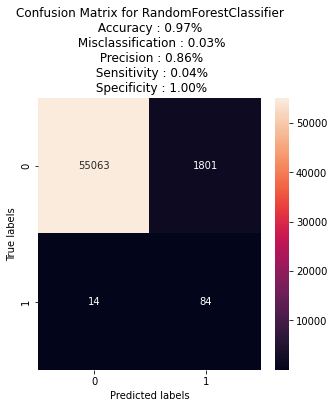

In [ ]:
model=best_model_RFC_Grid_2
model_name=model.__class__.__name__
    
print(f"training for model: {model_name}\n\n")
    
#model.fit(X_train,y_train.values.ravel())
score = model.score(X_test,y_test)*100
#print(f"Score for {model_name}:\n{score}")
y_pred=model.predict(X_test)
cm= confusion_matrix(y_test,y_pred)

TN=cm[0][0]
FN=cm[0][1]
FP=cm[1][0]
TP=cm[1][1]

Accuracy = ( TP + TN ) / (TP+TN+FP+FN)  
Misclassification = ( FP + FN ) / ( TP + TN + FP + FN )
Precision = TP / ( TP + FP )
Sensitivity = TP / ( TP + FN )
Specificity = TN / ( TN + FP )

print(f"Accuracy Score for {model_name}:\n{Accuracy*100:.2f}%")
print(f"Misclassification Score for {model_name}:\n{Misclassification*100:.2f}%")
print(f"Precision Score for {model_name}:\n{Precision*100:.2f}%")    
print(f"Sensitivity Score for {model_name}:\n{Sensitivity*100:.2f}%")
print(f"Specificity Score for {model_name}:\n{Specificity*100:.2f}%")

plt.figure(figsize=(5,5))
ax=plt.subplot()
sns.heatmap(cm,annot=True,fmt='g',ax=ax)
    
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title(f'Confusion Matrix for {model_name}\n Accuracy : {Accuracy:.2f}% \
\n Misclassification : {Misclassification:.2f}%\
\n Precision : {Precision:.2f}%\
\n Sensitivity : {Sensitivity:.2f}%\
\n Specificity : {Specificity:.2f}%')

In [ ]:
def cm(model_name):
  model=model_name
  model_name=model.__class__.__name__
    
  print(f"training for model: {model_name}\n\n")
    
  #model.fit(X_train,y_train.values.ravel())
  #score = model.score(X_test,y_test)*100
  #print(f"Score for {model_name}:\n{score}")
  y_pred=model.predict(X_test)
  cm= confusion_matrix(y_test,y_pred)

  TN=cm[0][0]
  FN=cm[0][1]
  FP=cm[1][0]
  TP=cm[1][1]

  Accuracy = ( TP + TN ) / (TP+TN+FP+FN)  *100
  Misclassification = ( FP + FN ) / ( TP + TN + FP + FN )*100
  Precision = TP / ( TP + FP )*100
  Sensitivity = TP / ( TP + FN )*100
  Specificity = TN / ( TN + FP )*100

  print(f"Accuracy Score for {model_name}:\n{Accuracy}%")
  print(f"Misclassification Score for {model_name}:\n{Misclassification}%")
  print(f"Precision Score for {model_name}:\n{Precision}%")    
  print(f"Sensitivity Score for {model_name}:\n{Sensitivity}%")
  print(f"Specificity Score for {model_name}:\n{Specificity}%")

  plt.figure(figsize=(5,5))
  ax=plt.subplot()
  labels = ['No Fraud', 'Fraud']
  df_cm = pd.DataFrame(cm, index = labels,
                  columns = labels)
  sns.heatmap(df_cm,annot=True,fmt='g',ax=ax)
    
  ax.set_xlabel('Predicted labels');
  ax.set_ylabel('True labels');
  ax.set_title(f'Confusion Matrix for {model_name}\n Accuracy : {Accuracy:.4f}% \
  \n Misclassification : {Misclassification:.4f}%\
  \n Precision : {Precision:.4f}%\
  \n Sensitivity : {Sensitivity:.4f}%\
  \n Specificity : {Specificity:.4f}%')

In [ ]:
def cm_actual(model_name):
  model=model_name
  model_name=model.__class__.__name__
    
  print(f"Actual data for model: {model_name}\n\n")
    
  #model.fit(X_train,y_train.values.ravel())
  #score = model.score(X_test,y_test)*100
  #print(f"Score for {model_name}:\n{score}")
  #y_pred=model.predict(X_test)
  cm= confusion_matrix(y_test,y_test)

  TN=cm[0][0]
  FN=cm[0][1]
  FP=cm[1][0]
  TP=cm[1][1]

  Accuracy = ( TP + TN ) / (TP+TN+FP+FN)  *100
  Misclassification = ( FP + FN ) / ( TP + TN + FP + FN )*100
  Precision = TP / ( TP + FP )*100
  Sensitivity = TP / ( TP + FN )*100
  Specificity = TN / ( TN + FP )*100

  print(f"Accuracy Score for {model_name}:\n{Accuracy}%")
  print(f"Misclassification Score for {model_name}:\n{Misclassification}%")
  print(f"Precision Score for {model_name}:\n{Precision}%")    
  print(f"Sensitivity Score for {model_name}:\n{Sensitivity}%")
  print(f"Specificity Score for {model_name}:\n{Specificity}%")

  plt.figure(figsize=(5,5))
  ax=plt.subplot()
  labels = ['No Fraud', 'Fraud']
  df_cm = pd.DataFrame(cm, index = labels,
                  columns = labels)
  sns.heatmap(df_cm,annot=True,fmt='g',ax=ax)
    
  ax.set_xlabel('Predicted labels');
  ax.set_ylabel('True labels');
  ax.set_title(f'Confusion Matrix for actual data for {model_name}\n Accuracy : {Accuracy:.4f}% \
  \n Misclassification : {Misclassification:.4f}%\
  \n Precision : {Precision:.4f}%\
  \n Sensitivity : {Sensitivity:.4f}%\
  \n Specificity : {Specificity:.4f}%')

In [ ]:
ada= AdaBoostClassifier(algorithm='SAMME')

In [ ]:
X=df_new_random_1[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']]
y=df_new_random_1['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 42)


feature_selection(ada)


(Step) Excluded = V26, V2, V14, V21, V11, V3, V22, V12, V27, V13, V17, V6, V10, V25, V5, V19, V18, V8, V1, V24, V15, V16, V20, V4, V28, V23, V7, V9
(Step) Trying V26...
(Step) - Features = V26
(Step) - Adjusted R^2: This = 0.758; Best = 0.000
(Step) - New Best!   : Feature = V26; R^2 = 0.759; Adjusted R^2 = 0.758
(Step) Trying V2...
(Step) - Features = V2
(Step) - Adjusted R^2: This = 0.917; Best = 0.758
(Step) - New Best!   : Feature = V2; R^2 = 0.917; Adjusted R^2 = 0.917
(Step) Trying V14...
(Step) - Features = V14
(Step) - Adjusted R^2: This = 0.947; Best = 0.917
(Step) - New Best!   : Feature = V14; R^2 = 0.947; Adjusted R^2 = 0.947
(Step) Trying V21...
(Step) - Features = V21
(Step) - Adjusted R^2: This = 0.864; Best = 0.947
(Step) Trying V11...
(Step) - Features = V11
(Step) - Adjusted R^2: This = 0.947; Best = 0.947
(Step) Trying V3...
(Step) - Features = V3
(Step) - Adjusted R^2: This = 0.909; Best = 0.947
(Step) Trying V22...
(Step) - Features = V22
(Step) - Adjusted R^2: Th

In [ ]:
X=df_new_random_1[['V10', 'V2', 'V12']]
y=df_new_random_1['Class']
X_train_ada, X_test_ada, y_train_ada, y_test_ada = train_test_split(X, y,test_size=0.2, random_state = 42)


In [ ]:
ada.fit(X_train_ada,y_train_ada)

AdaBoostClassifier(algorithm='SAMME')

In [ ]:
ada.score(X_test_ada,y_test_ada)

0.9699248120300752

In [ ]:
params_ada={ 'n_estimators':range(50,200,10),
            'learning_rate': [0.001,0.01,0.1,0.2,0.5]}


In [ ]:
ada_param=GridSearchCV(ada,param_grid=params_ada)

In [ ]:
ada_param.fit(X_train_ada,y_train_ada)

GridSearchCV(estimator=AdaBoostClassifier(algorithm='SAMME'),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5],
                         'n_estimators': range(50, 200, 10)})

In [ ]:
ada_param.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

In [ ]:
best_param_ada= AdaBoostClassifier(algorithm='SAMME', n_estimators=50,learning_rate= 0.1)

In [ ]:
best_param_ada.fit(X_train_ada,y_train_ada)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1)

In [ ]:
best_param_ada.score(X_test_ada,y_test_ada)

0.9699248120300752

In [ ]:
best_param_ada.score(X_train_ada,y_train_ada)

0.9717514124293786

In [ ]:
X=df_new_random_1[['V10', 'V2', 'V12']]
y=df_new_random_1['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 42)


training for model: AdaBoostClassifier


Accuracy Score for AdaBoostClassifier:
96.99248120300751%
Misclassification Score for AdaBoostClassifier:
3.007518796992481%
Precision Score for AdaBoostClassifier:
87.5%
Sensitivity Score for AdaBoostClassifier:
100.0%
Specificity Score for AdaBoostClassifier:
96.19047619047619%


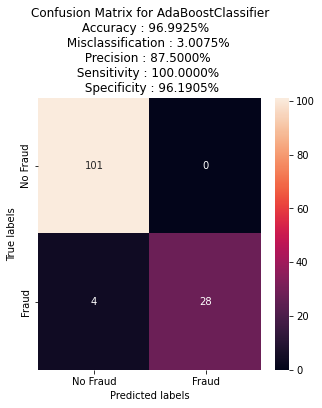

In [ ]:
cm(best_param_ada)

In [ ]:

X=df[['V10', 'V2', 'V12']]
y=df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 42)



training for model: AdaBoostClassifier


Accuracy Score for AdaBoostClassifier:
98.8676661634072%
Misclassification Score for AdaBoostClassifier:
1.1323338365928164%
Precision Score for AdaBoostClassifier:
81.63265306122449%
Sensitivity Score for AdaBoostClassifier:
11.315417256011315%
Specificity Score for AdaBoostClassifier:
99.96800284419163%


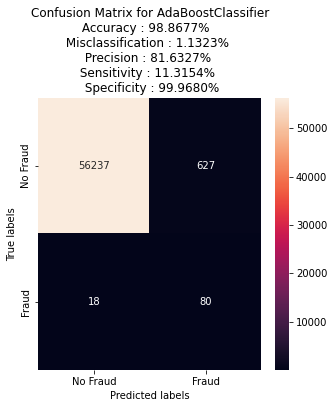

In [ ]:
cm(best_param_ada)

In [ ]:
Ada_cross = cross_val_predict(best_param_ada, X_train, y_train, cv=cv)
print('AdaBoost ROC AUC Score: ', roc_auc_score(y_train, Ada_cross))

Ada_roc=roc_auc_score(y_train, Ada_cross)


Ada_tree_fpr, Ada_tree_tpr, Ada_tree_thresold = roc_curve(y_train, Ada_cross)



AdaBoost ROC AUC Score:  0.7841716318126153


In [ ]:
Ada_roc

0.7841716318126153

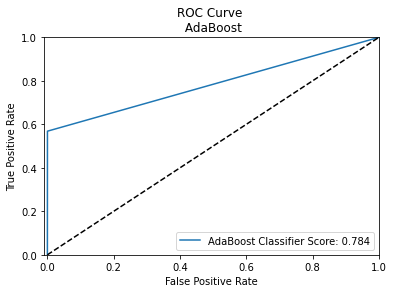

In [ ]:
plt.figure()
plt.title('ROC Curve \n AdaBoost')
plt.plot(Ada_tree_fpr, Ada_tree_tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.annotate('Minimum ROC Score of 50% \n', xy=(0.5, 0.5), xytext=(0.6, 0.3))
plt.legend([f"AdaBoost Classifier Score: {Ada_roc:.3f}"],loc ="lower right")

In [ ]:

X=df[['V17', 'V19']]
y=df['Class']

training for model: AdaBoostClassifier


Accuracy Score for AdaBoostClassifier:
99.67240973712023%
Misclassification Score for AdaBoostClassifier:
0.3275902628797747%
Precision Score for AdaBoostClassifier:
72.35772357723577%
Sensitivity Score for AdaBoostClassifier:
30.875975715524717%
Specificity Score for AdaBoostClassifier:
99.9520542632926%


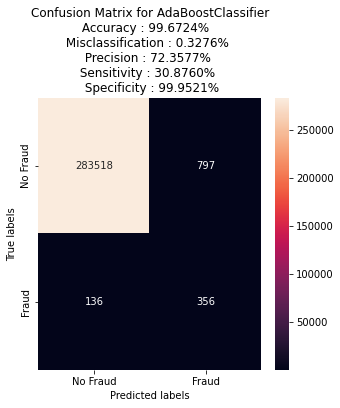

In [ ]:
cm_full_data(best_param_ada)

In [ ]:
KNN=KNeighborsClassifier()

In [ ]:
feature_selection(KNN)


(Step) Excluded = V17, V27
(Step) Trying V17...
(Step) - Features = V17
(Step) - Adjusted R^2: This = 0.947; Best = 0.000
(Step) - New Best!   : Feature = V17; R^2 = 0.947; Adjusted R^2 = 0.947
(Step) Trying V27...
(Step) - Features = V27
(Step) - Adjusted R^2: This = 0.894; Best = 0.947
Added feature V17  with R^2 = 0.947 and adjusted R^2 = 0.947

(Step) Excluded = V27
(Step) Trying V27...
(Step) - Features = V17, V27
(Step) - Adjusted R^2: This = 0.947; Best = 0.947

Resulting features:
V17


In [ ]:

X_T=df_new_random_1.drop(['Class','Time','Amount'], axis=1)     
y_T=df_new_random_1['Class']

In [ ]:

#X_T=df.drop(['Class','Time','Amount'], axis=1)     
#y_T=df['Class']

In [ ]:
X_T.shape

(664, 28)

In [ ]:
X_T.shape

(664, 28)

In [ ]:
n_cols=X_T.shape[1]
n_cols

28

In [ ]:
y_T.shape

(664,)

In [ ]:
model_T = Sequential()

In [ ]:
# Add the first hidden layer
model_T.add(Dense(50, activation = 'relu', input_shape = (n_cols, )))
# Add the second hidden layer
model_T.add(Dense(30, activation = 'relu'))
# Add the output layer
model_T.add(Dense(2, activation = 'softmax')) 

#model.layer.pop() #remove last layer

In [ ]:
print(model_T.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1450      
                                                                 
 dense_1 (Dense)             (None, 30)                1530      
                                                                 
 dense_2 (Dense)             (None, 2)                 62        
                                                                 
Total params: 3,042
Trainable params: 3,042
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#model_T.pop()
#tf.keras.backend.clear_session()


In [ ]:
model_T.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])

In [ ]:
X=df.drop(['Class','Time','Amount'], axis=1)     
y=df['Class']

In [ ]:
X_train_T, X_test_T, y_train_T, y_test_T = train_test_split(
    X_T, y_T, 
    test_size = 0.2,
    random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.2,
    random_state = 42)

In [ ]:

from sklearn.feature_selection import SequentialFeatureSelector



In [ ]:
%%time
# insert code here
fitted_model = model_T.fit(
    X_train_T,
    y_train_T,
    validation_split = 0.2,
    batch_size = 20,
    epochs = 20,
    verbose = 1)

Epoch 1/20
22/22 [==============================] - 1s 12ms/step - loss: 0.4783 - accuracy: 0.8892 - val_loss: 0.3803 - val_accuracy: 0.9439
Epoch 2/20
22/22 [==============================] - 0s 3ms/step - loss: 0.2064 - accuracy: 0.9623 - val_loss: 0.2807 - val_accuracy: 0.9533
Epoch 3/20
22/22 [==============================] - 0s 4ms/step - loss: 0.1497 - accuracy: 0.9623 - val_loss: 0.2393 - val_accuracy: 0.9533
Epoch 4/20
22/22 [==============================] - 0s 4ms/step - loss: 0.1217 - accuracy: 0.9693 - val_loss: 0.2321 - val_accuracy: 0.9720
Epoch 5/20
22/22 [==============================] - 0s 4ms/step - loss: 0.1043 - accuracy: 0.9717 - val_loss: 0.2286 - val_accuracy: 0.9720
Epoch 6/20
22/22 [==============================] - 0s 4ms/step - loss: 0.0920 - accuracy: 0.9693 - val_loss: 0.2335 - val_accuracy: 0.9626
Epoch 7/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0841 - accuracy: 0.9693 - val_loss: 0.2393 - val_accuracy: 0.9533
Epoch 8/20
22/22 [=

In [ ]:
# insert code here
score = model_T.evaluate(X_test_T, y_test_T, batch_size = 315)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

#score here is mse, need to change to rmse

#sqrt of score showing example +/- 57, is this good ?
print('\nTest loss: %.6f, Test RMSE: %.6f' % tuple(np.sqrt(score)))

1/1 [==============================] - 0s 18ms/step - loss: 0.0989 - accuracy: 0.9624

Test loss: 0.098851, Test accuracy: 0.962406

Test loss: 0.314405, Test RMSE: 0.981023


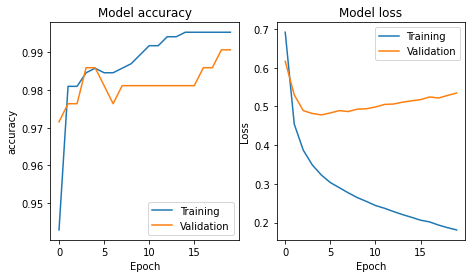

In [ ]:
# insert code here
#rmse version

#fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig, ax = plt.subplots(1, 2)
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

#plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(np.sqrt(fitted_model.history['accuracy']), label = 'Training')
ax[0].plot(np.sqrt(fitted_model.history['val_accuracy']), label = 'Validation')
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(np.sqrt(fitted_model.history['loss']), label = 'Training')
ax[1].plot(np.sqrt(fitted_model.history['val_loss']), label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

In [ ]:
predict_x=model_T.predict(X_test_T) 
predict_x
predictions=np.argmax(predict_x,axis=1)
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0])

In [ ]:
predictions.shape

(133,)

In [ ]:
y_test_T_array = np.array(y_test_T)
y_test_T_array

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0])

In [ ]:
y_test_T.shape

(133,)

In [ ]:
print(model_T.evaluate(X_train_T, y_train_T))

17/17 [==============================] - 0s 2ms/step - loss: 0.0815 - accuracy: 0.9887
[0.08145591616630554, 0.9887005686759949]


In [ ]:
print(model_T.evaluate(X_test_T, y_test_T))

5/5 [==============================] - 0s 2ms/step - loss: 0.0989 - accuracy: 0.9624
[0.09885076433420181, 0.9624060392379761]


In [ ]:
residuals=predictions-y_test_T

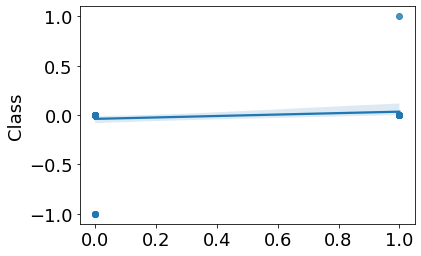

In [ ]:
sns.regplot(x=predictions,y=residuals,data=None,scatter=True)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
sns.reset_orig

<function seaborn.rcmod.reset_orig>

In [ ]:
X_train_T, X_test_T, y_train_T, y_test_T = train_test_split(
    X_T, y_T, 
    test_size = 0.2,
    random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.2,
    random_state = 42)

In [ ]:
#plt.rcParams.update(plt.rcParamsDefault)
#plt.style.use('default')

training for model: Sequential


Accuracy Score for Sequential:
96.99248120300751%
Misclassification Score for Sequential:
3.007518796992481%
Precision Score for Sequential:
87.5%
Sensitivity Score for Sequential:
100.0%
Specificity Score for Sequential:
96.19047619047619%


Text(0.5, 1.0, 'Confusion Matrix for Sequential\n Accuracy : 96.9925% \n Misclassification : 3.0075%\n Precision : 87.5000%\n Sensitivity : 100.0000%\n Specificity : 96.1905%')

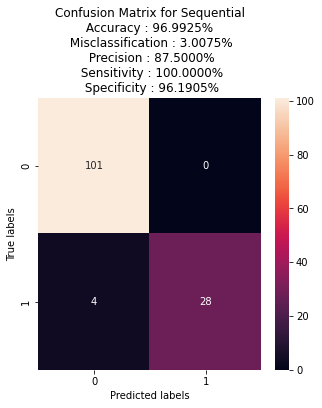

In [ ]:

model=model_T
model_name=model.__class__.__name__
    
print(f"training for model: {model_name}\n\n")
    
#model.fit(X_train_T,y_train_T.values.ravel())
#score = model.score(X_test_T,y_test_T)*100
    
#print(f"Score for {model_name}:\n{evaluate}")
    
y_pred=model.predict(X_test_T)
cm= confusion_matrix(y_test_T,predictions)
TN=cm[0][0]
FN=cm[0][1]
FP=cm[1][0]
TP=cm[1][1]

Accuracy = ( TP + TN ) / (TP+TN+FP+FN)  *100
Misclassification = ( FP + FN ) / ( TP + TN + FP + FN ) *100
Precision = TP / ( TP + FP ) *100
Sensitivity = TP / ( TP + FN ) *100
Specificity = TN / ( TN + FP ) *100

print(f"Accuracy Score for {model_name}:\n{Accuracy}%")
print(f"Misclassification Score for {model_name}:\n{Misclassification}%")
print(f"Precision Score for {model_name}:\n{Precision}%")    
print(f"Sensitivity Score for {model_name}:\n{Sensitivity}%")
print(f"Specificity Score for {model_name}:\n{Specificity}%")

plt.figure(figsize=(5,5))
ax=plt.subplot()
sns.heatmap(cm,annot=True,fmt='g',ax=ax)
    
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title(f'Confusion Matrix for {model_name}\n Accuracy : {Accuracy:.4f}% \
\n Misclassification : {Misclassification:.4f}%\
\n Precision : {Precision:.4f}%\
\n Sensitivity : {Sensitivity:.4f}%\
\n Specificity : {Specificity:.4f}%')

Actual data for training model: Sequential


Accuracy Score for Sequential:
100.0%
Misclassification Score for Sequential:
0.0%
Precision Score for Sequential:
100.0%
Sensitivity Score for Sequential:
100.0%
Specificity Score for Sequential:
100.0%


Text(0.5, 1.0, 'Confusion Matrix for actual training data model: Sequential\n Accuracy : 100.0000% \n Misclassification : 0.0000%\n Precision : 100.0000%\n Sensitivity : 100.0000%\n Specificity : 100.0000%')

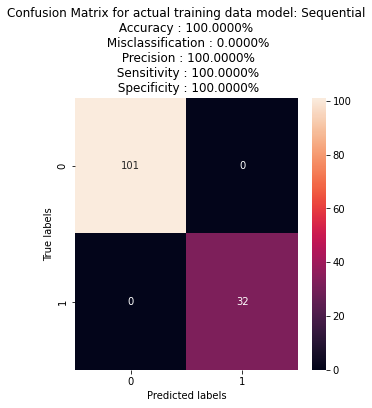

In [ ]:

model=model_T
model_name=model.__class__.__name__
    
print(f"Actual data for training model: {model_name}\n\n")
    
#model.fit(X_train_T,y_train_T.values.ravel())
#score = model.score(X_test_T,y_test_T)*100
    
#print(f"Score for {model_name}:\n{evaluate}")
    
#y_pred=model.predict(X_test_T)
cm= confusion_matrix(y_test_T,y_test_T)
TN=cm[0][0]
FN=cm[0][1]
FP=cm[1][0]
TP=cm[1][1]

Accuracy = ( TP + TN ) / (TP+TN+FP+FN)  *100
Misclassification = ( FP + FN ) / ( TP + TN + FP + FN ) *100
Precision = TP / ( TP + FP ) *100
Sensitivity = TP / ( TP + FN ) *100
Specificity = TN / ( TN + FP ) *100

print(f"Accuracy Score for {model_name}:\n{Accuracy}%")
print(f"Misclassification Score for {model_name}:\n{Misclassification}%")
print(f"Precision Score for {model_name}:\n{Precision}%")    
print(f"Sensitivity Score for {model_name}:\n{Sensitivity}%")
print(f"Specificity Score for {model_name}:\n{Specificity}%")

plt.figure(figsize=(5,5))
ax=plt.subplot()
sns.heatmap(cm,annot=True,fmt='g',ax=ax)
    
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title(f'Confusion Matrix for actual training data model: {model_name}\n Accuracy : {Accuracy:.4f}% \
\n Misclassification : {Misclassification:.4f}%\
\n Precision : {Precision:.4f}%\
\n Sensitivity : {Sensitivity:.4f}%\
\n Specificity : {Specificity:.4f}%')

In [ ]:
X=df.drop(['Class','Time','Amount'], axis=1)     
y=df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.2,
    random_state = 42)



In [ ]:
X_test.shape

(56962, 28)

In [ ]:
y_test.shape

(56962,)

training for model: Sequential


Score for Sequential:
[0.09826181828975677, 0.969924807548523]
Accuracy Score for Sequential:
99.55233313437029%
Misclassification Score for Sequential:
0.447666865629718%
Precision Score for Sequential:
88.77551020408163%
Sensitivity Score for Sequential:
26.283987915407852%
Specificity Score for Sequential:
99.98057600960605%


Text(0.5, 1.0, 'Confusion Matrix for Sequential\n Accuracy : 99.5523% \n Misclassification : 0.4477%\n Precision : 88.7755%\n Sensitivity : 26.2840%\n Specificity : 99.9806%')

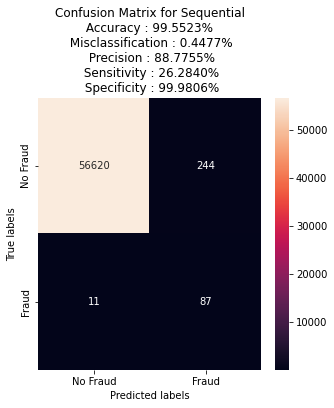

In [ ]:

model=model_T
model_name=model.__class__.__name__
    
print(f"training for model: {model_name}\n\n")
    
#model.fit(X_train_ada,y_train_ada.values.ravel())
#score = model.score(X_test,y_test)*100
    
print(f"Score for {model_name}:\n{score}")
    
y_pred=model.predict(X_test)
predictions=np.argmax(y_pred,axis=1)
cm= confusion_matrix(y_test,predictions)
TN=cm[0][0]
FN=cm[0][1]
FP=cm[1][0]
TP=cm[1][1]

Accuracy = ( TP + TN ) / (TP+TN+FP+FN)  *100
Misclassification = ( FP + FN ) / ( TP + TN + FP + FN ) *100
Precision = TP / ( TP + FP ) *100
Sensitivity = TP / ( TP + FN ) *100
Specificity = TN / ( TN + FP ) *100

print(f"Accuracy Score for {model_name}:\n{Accuracy}%")
print(f"Misclassification Score for {model_name}:\n{Misclassification}%")
print(f"Precision Score for {model_name}:\n{Precision}%")    
print(f"Sensitivity Score for {model_name}:\n{Sensitivity}%")
print(f"Specificity Score for {model_name}:\n{Specificity}%")

plt.figure(figsize=(5,5))
ax=plt.subplot()
labels = ['No Fraud', 'Fraud']
df_cm = pd.DataFrame(cm, index = labels,
                  columns = labels)
sns.heatmap(df_cm,annot=True,fmt='g',ax=ax)
    
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title(f'Confusion Matrix for {model_name}\n Accuracy : {Accuracy:.4f}% \
\n Misclassification : {Misclassification:.4f}%\
\n Precision : {Precision:.4f}%\
\n Sensitivity : {Sensitivity:.4f}%\
\n Specificity : {Specificity:.4f}%')

In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = model_T.predict(X_test)
predictions=np.argmax(y_pred_keras,axis=1)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, predictions)

In [ ]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)




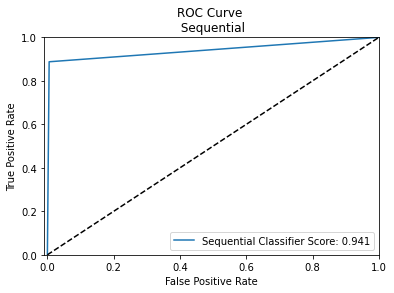

In [ ]:
plt.figure()
plt.title('ROC Curve \n Sequential')
plt.plot(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.annotate('Minimum ROC Score of 50% \n', xy=(0.5, 0.5), xytext=(0.6, 0.3))
plt.legend([f"Sequential Classifier Score: {auc_keras:.3f}"],loc ="lower right")

In [ ]:
X=df.drop(['Class','Time','Amount'], axis=1)     
y=df['Class']




training for model: Sequential


Score for Sequential:
[0.09949731081724167, 0.9624060392379761]
Accuracy Score for Sequential:
99.44945173398125%
Misclassification Score for Sequential:
0.5505482660187425%
Precision Score for Sequential:
89.02439024390245%
Sensitivity Score for Sequential:
22.438524590163937%
Specificity Score for Sequential:
99.9809089462799%


Text(0.5, 1.0, 'Confusion Matrix for Sequential\n Accuracy : 99.4495% \n Misclassification : 0.5505%\n Precision : 89.0244%\n Sensitivity : 22.4385%\n Specificity : 99.9809%')

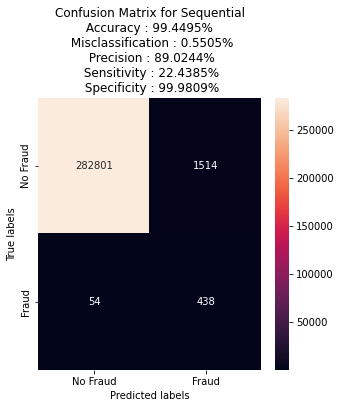

In [ ]:

model=model_T
model_name=model.__class__.__name__
    
print(f"training for model: {model_name}\n\n")
    
#model.fit(X_train_ada,y_train_ada.values.ravel())
#score = model.score(X_test,y_test)*100
    
print(f"Score for {model_name}:\n{score}")
    
y_pred=model.predict(X)
predictions=np.argmax(y_pred,axis=1)
cm= confusion_matrix(y,predictions)
TN=cm[0][0]
FN=cm[0][1]
FP=cm[1][0]
TP=cm[1][1]

Accuracy = ( TP + TN ) / (TP+TN+FP+FN)  *100
Misclassification = ( FP + FN ) / ( TP + TN + FP + FN ) *100
Precision = TP / ( TP + FP ) *100
Sensitivity = TP / ( TP + FN ) *100
Specificity = TN / ( TN + FP ) *100

print(f"Accuracy Score for {model_name}:\n{Accuracy}%")
print(f"Misclassification Score for {model_name}:\n{Misclassification}%")
print(f"Precision Score for {model_name}:\n{Precision}%")    
print(f"Sensitivity Score for {model_name}:\n{Sensitivity}%")
print(f"Specificity Score for {model_name}:\n{Specificity}%")

plt.figure(figsize=(5,5))
ax=plt.subplot()
labels = ['No Fraud', 'Fraud']
df_cm = pd.DataFrame(cm, index = labels,
                  columns = labels)
sns.heatmap(df_cm,annot=True,fmt='g',ax=ax)
    
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title(f'Confusion Matrix for {model_name}\n Accuracy : {Accuracy:.4f}% \
\n Misclassification : {Misclassification:.4f}%\
\n Precision : {Precision:.4f}%\
\n Sensitivity : {Sensitivity:.4f}%\
\n Specificity : {Specificity:.4f}%')

In [ ]:
X=df_new_random_1.drop(['Class','Time','Amount'], axis=1)     
y=df_new_random_1['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.2,
    random_state = 42)


Train Test actual data 




Text(0.5, 1.0, 'Train Test actual data \n Accuracy : 100.0000% \n Misclassification : 0.0000%\n Precision : 100.0000%\n Sensitivity : 100.0000%\n Specificity : 100.0000%')

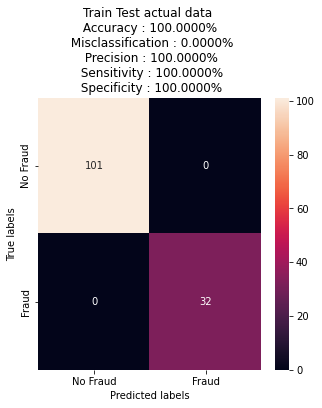

In [ ]:



    
print(f"Train Test actual data \n\n")
    
#model.fit(X_train_ada,y_train_ada.values.ravel())
#score = model.score(X_test,y_test)*100
  
    
#y_pred=model.predict(X_test)
#predictions=np.argmax(y_pred,axis=1)
cm= confusion_matrix(y_test,y_test)
TN=cm[0][0]
FN=cm[0][1]
FP=cm[1][0]
TP=cm[1][1]

Accuracy = ( TP + TN ) / (TP+TN+FP+FN)  *100
Misclassification = ( FP + FN ) / ( TP + TN + FP + FN ) *100
Precision = TP / ( TP + FP ) *100
Sensitivity = TP / ( TP + FN ) *100
Specificity = TN / ( TN + FP ) *100

plt.figure(figsize=(5,5))
ax=plt.subplot()
labels = ['No Fraud', 'Fraud']
df_cm = pd.DataFrame(cm, index = labels,
                  columns = labels)
sns.heatmap(df_cm,annot=True,fmt='g',ax=ax)
    
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title(f'Train Test actual data \n Accuracy : {Accuracy:.4f}% \
\n Misclassification : {Misclassification:.4f}%\
\n Precision : {Precision:.4f}%\
\n Sensitivity : {Sensitivity:.4f}%\
\n Specificity : {Specificity:.4f}%')

In [ ]:
X=df.drop(['Class','Time','Amount'], axis=1)     
y=df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.2,
    random_state = 42)


Partial actual data 




Text(0.5, 1.0, 'Partial actual data \n Accuracy : 100.0000% \n Misclassification : 0.0000%\n Precision : 100.0000%\n Sensitivity : 100.0000%\n Specificity : 100.0000%')

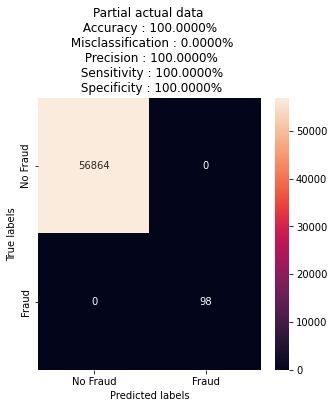

In [ ]:



    
print(f"Partial actual data \n\n")
    
#model.fit(X_train_ada,y_train_ada.values.ravel())
#score = model.score(X_test,y_test)*100
  
    
#y_pred=model.predict(X_test)
#predictions=np.argmax(y_pred,axis=1)
cm= confusion_matrix(y_test,y_test)
TN=cm[0][0]
FN=cm[0][1]
FP=cm[1][0]
TP=cm[1][1]

Accuracy = ( TP + TN ) / (TP+TN+FP+FN)  *100
Misclassification = ( FP + FN ) / ( TP + TN + FP + FN ) *100
Precision = TP / ( TP + FP ) *100
Sensitivity = TP / ( TP + FN ) *100
Specificity = TN / ( TN + FP ) *100

plt.figure(figsize=(5,5))
ax=plt.subplot()
labels = ['No Fraud', 'Fraud']
df_cm = pd.DataFrame(cm, index = labels,
                  columns = labels)
sns.heatmap(df_cm,annot=True,fmt='g',ax=ax)
    
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title(f'Partial actual data \n Accuracy : {Accuracy:.4f}% \
\n Misclassification : {Misclassification:.4f}%\
\n Precision : {Precision:.4f}%\
\n Sensitivity : {Sensitivity:.4f}%\
\n Specificity : {Specificity:.4f}%')

In [ ]:
X=df.drop(['Class','Time','Amount'], axis=1)     
y=df['Class']




Actual data 




Text(0.5, 1.0, 'Actual data \n Accuracy : 100.0000% \n Misclassification : 0.0000%\n Precision : 100.0000%\n Sensitivity : 100.0000%\n Specificity : 100.0000%')

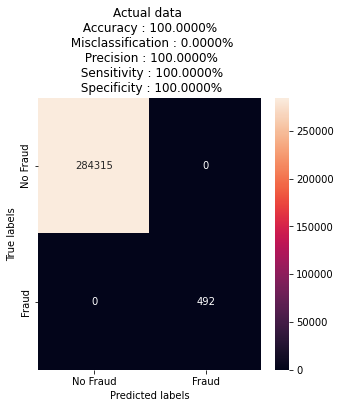

In [ ]:



    
print(f"Actual data \n\n")
    
#model.fit(X_train_ada,y_train_ada.values.ravel())
#score = model.score(X_test,y_test)*100
  
    
#y_pred=model.predict(X_test)
#predictions=np.argmax(y_pred,axis=1)
cm= confusion_matrix(y,y)
TN=cm[0][0]
FN=cm[0][1]
FP=cm[1][0]
TP=cm[1][1]

Accuracy = ( TP + TN ) / (TP+TN+FP+FN)  *100
Misclassification = ( FP + FN ) / ( TP + TN + FP + FN ) *100
Precision = TP / ( TP + FP ) *100
Sensitivity = TP / ( TP + FN ) *100
Specificity = TN / ( TN + FP ) *100

plt.figure(figsize=(5,5))
ax=plt.subplot()
labels = ['No Fraud', 'Fraud']
df_cm = pd.DataFrame(cm, index = labels,
                  columns = labels)
sns.heatmap(df_cm,annot=True,fmt='g',ax=ax)
    
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title(f'Actual data \n Accuracy : {Accuracy:.4f}% \
\n Misclassification : {Misclassification:.4f}%\
\n Precision : {Precision:.4f}%\
\n Sensitivity : {Sensitivity:.4f}%\
\n Specificity : {Specificity:.4f}%')

In [ ]:
X_test=df.drop(['Class','Time','Amount'], axis=1)     
y_test=df['Class']

Parital data 


Accuracy Score for Sequential:
100.0%
Misclassification Score for Sequential:
0.0%
Precision Score for Sequential:
100.0%
Sensitivity Score for Sequential:
100.0%
Specificity Score for Sequential:
100.0%


Text(0.5, 1.0, 'Actual data \n Accuracy : 100.0000% \n Misclassification : 0.0000%\n Precision : 100.0000%\n Sensitivity : 100.0000%\n Specificity : 100.0000%')

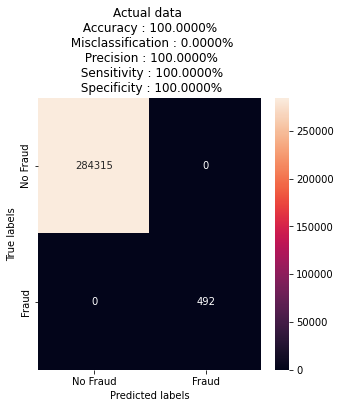

In [ ]:



    
print(f"Parital data \n\n")
    
#model.fit(X_train_ada,y_train_ada.values.ravel())
#score = model.score(X_test,y_test)*100
  
    
#y_pred=model.predict(X_test)
#predictions=np.argmax(y_pred,axis=1)
cm= confusion_matrix(y_test,y_test)
TN=cm[0][0]
FN=cm[0][1]
FP=cm[1][0]
TP=cm[1][1]

Accuracy = ( TP + TN ) / (TP+TN+FP+FN)  *100
Misclassification = ( FP + FN ) / ( TP + TN + FP + FN ) *100
Precision = TP / ( TP + FP ) *100
Sensitivity = TP / ( TP + FN ) *100
Specificity = TN / ( TN + FP ) *100

print(f"Accuracy Score for {model_name}:\n{Accuracy}%")
print(f"Misclassification Score for {model_name}:\n{Misclassification}%")
print(f"Precision Score for {model_name}:\n{Precision}%")    
print(f"Sensitivity Score for {model_name}:\n{Sensitivity}%")
print(f"Specificity Score for {model_name}:\n{Specificity}%")

plt.figure(figsize=(5,5))
ax=plt.subplot()
labels = ['No Fraud', 'Fraud']
df_cm = pd.DataFrame(cm, index = labels,
                  columns = labels)
sns.heatmap(df_cm,annot=True,fmt='g',ax=ax)
    
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title(f'Actual data \n Accuracy : {Accuracy:.4f}% \
\n Misclassification : {Misclassification:.4f}%\
\n Precision : {Precision:.4f}%\
\n Sensitivity : {Sensitivity:.4f}%\
\n Specificity : {Specificity:.4f}%')

Actual data 


Accuracy Score for Sequential:
100.0%
Misclassification Score for Sequential:
0.0%
Precision Score for Sequential:
100.0%
Sensitivity Score for Sequential:
100.0%
Specificity Score for Sequential:
100.0%


Text(0.5, 1.0, 'Actual Data \n Misclassification : 0.0000%\n Precision : 100.0000%\n Sensitivity : 100.0000%\n Specificity : 100.0000%')

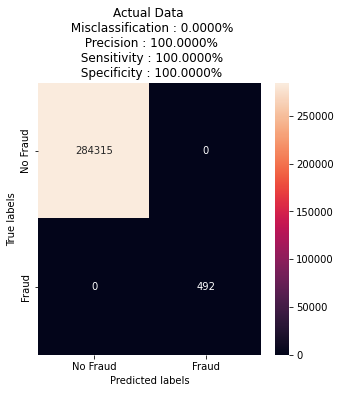

In [ ]:



    
print(f"Actual data \n\n")
    
#model.fit(X_train_ada,y_train_ada.values.ravel())
#score = model.score(X_test,y_test)*100
  
    
#y_pred=model.predict(X_test)
#predictions=np.argmax(y_pred,axis=1)
cm= confusion_matrix(y_test,y_test)
TN=cm[0][0]
FN=cm[0][1]
FP=cm[1][0]
TP=cm[1][1]

Accuracy = ( TP + TN ) / (TP+TN+FP+FN)  *100
Misclassification = ( FP + FN ) / ( TP + TN + FP + FN ) *100
Precision = TP / ( TP + FP ) *100
Sensitivity = TP / ( TP + FN ) *100
Specificity = TN / ( TN + FP ) *100

print(f"Accuracy Score for {model_name}:\n{Accuracy}%")
print(f"Misclassification Score for {model_name}:\n{Misclassification}%")
print(f"Precision Score for {model_name}:\n{Precision}%")    
print(f"Sensitivity Score for {model_name}:\n{Sensitivity}%")
print(f"Specificity Score for {model_name}:\n{Specificity}%")

plt.figure(figsize=(5,5))
ax=plt.subplot()
labels = ['No Fraud', 'Fraud']
df_cm = pd.DataFrame(cm, index = labels,
                  columns = labels)
sns.heatmap(df_cm,annot=True,fmt='g',ax=ax)
    
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title(f'Actual Data \
\n Misclassification : {Misclassification:.4f}%\
\n Precision : {Precision:.4f}%\
\n Sensitivity : {Sensitivity:.4f}%\
\n Specificity : {Specificity:.4f}%')

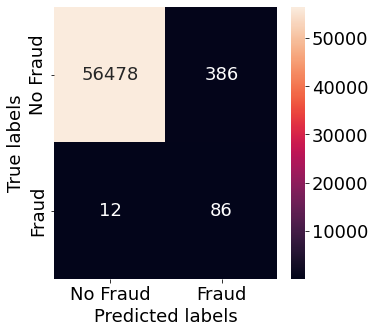

In [ ]:
predict_x=model_T.predict(X_test) 
predict_x
predictions=np.argmax(predict_x,axis=1)



model=model_T
_pred=model.predict(X_test)
cm= confusion_matrix(y_test,predictions)
plt.figure(figsize=(5,5))
ax=plt.subplot()

labels = ['No Fraud', 'Fraud']
df_cm = pd.DataFrame(cm, index = labels,
                  columns = labels)
sns.heatmap(df_cm,annot=True,fmt='g',ax=ax,)
    
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');


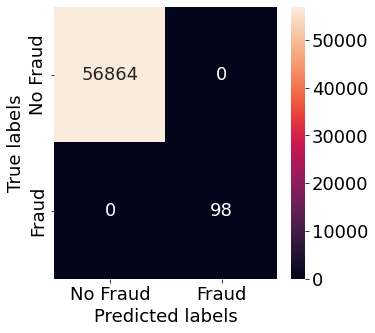

In [ ]:
cm= confusion_matrix(y_test,y_test)
plt.figure(figsize=(5,5))
ax=plt.subplot()

labels = ['No Fraud', 'Fraud']
df_cm = pd.DataFrame(cm, index = labels,
                  columns = labels)
sns.heatmap(df_cm,annot=True,fmt='g',ax=ax,)
    
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');


In [ ]:
X=df.drop(['Class','Time','Amount'], axis=1)     
y=df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.2,
    random_state = 42)



In [ ]:
clf1=Dec_tree_model_Grid
clf2=best_model_RFC_Grid_2
#clf3=model_T



In [ ]:
X=df_new_random_1.drop(['Class','Time','Amount'], axis=1)     
y=df_new_random_1['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.2,
    random_state = 42)



In [ ]:
voting_test = VotingClassifier(estimators = [('Dec Tree',clf1), ('Random Forest',clf2)], voting='hard') 

In [ ]:
voting_test.fit(X_train, y_train)

VotingClassifier(estimators=[('Dec Tree',
                              DecisionTreeClassifier(max_depth=3,
                                                     min_samples_split=10,
                                                     random_state=42)),
                             ('Random Forest',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=5,
                                                     n_estimators=116,
                                                     random_state=42))])

In [ ]:
voting_test.score(X_test,y_test)

0.9699248120300752

training for model: VotingClassifier


Accuracy Score for VotingClassifier:
96.99248120300751%
Misclassification Score for VotingClassifier:
3.007518796992481%
Precision Score for VotingClassifier:
87.5%
Sensitivity Score for VotingClassifier:
100.0%
Specificity Score for VotingClassifier:
96.19047619047619%


Text(0.5, 1.0, 'Confusion Matrix for VotingClassifier\n Accuracy : 96.9925% \n Misclassification : 3.0075%\n Precision : 87.5000%\n Sensitivity : 100.0000%\n Specificity : 96.1905%')

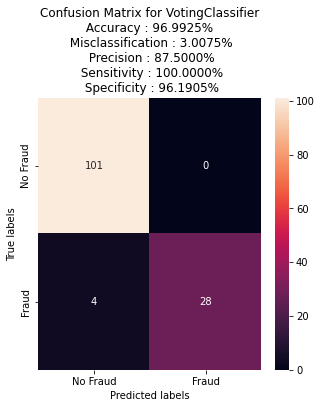

In [ ]:

model=voting_test
model_name=model.__class__.__name__
    
print(f"training for model: {model_name}\n\n")
    
#model.fit(X_train_ada,y_train_ada.values.ravel())
#score = model.score(X_test,y_test)*100
    
#print(f"Score for {model_name}:\n{score}")
    
y_pred=model.predict(X_test)
#predictions=np.argmax(y_pred,axis=1)
cm= confusion_matrix(y_test,y_pred)
TN=cm[0][0]
FN=cm[0][1]
FP=cm[1][0]
TP=cm[1][1]

Accuracy = ( TP + TN ) / (TP+TN+FP+FN)  *100
Misclassification = ( FP + FN ) / ( TP + TN + FP + FN ) *100
Precision = TP / ( TP + FP ) *100
Sensitivity = TP / ( TP + FN ) *100
Specificity = TN / ( TN + FP ) *100

print(f"Accuracy Score for {model_name}:\n{Accuracy}%")
print(f"Misclassification Score for {model_name}:\n{Misclassification}%")
print(f"Precision Score for {model_name}:\n{Precision}%")    
print(f"Sensitivity Score for {model_name}:\n{Sensitivity}%")
print(f"Specificity Score for {model_name}:\n{Specificity}%")

plt.figure(figsize=(5,5))
ax=plt.subplot()
labels = ['No Fraud', 'Fraud']
df_cm = pd.DataFrame(cm, index = labels,
                  columns = labels)
sns.heatmap(df_cm,annot=True,fmt='g',ax=ax)
    
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title(f'Confusion Matrix for {model_name}\n Accuracy : {Accuracy:.4f}% \
\n Misclassification : {Misclassification:.4f}%\
\n Precision : {Precision:.4f}%\
\n Sensitivity : {Sensitivity:.4f}%\
\n Specificity : {Specificity:.4f}%')

In [ ]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)

voting_cross = cross_val_predict(voting_test, X_train, y_train, cv=cv)

In [ ]:

print('voting_test ROC AUC Score: ', roc_auc_score(y_train, voting_cross))

voting_roc=roc_auc_score(y_train, voting_cross)


voting_fpr, voting_tpr, voting_thresold = roc_curve(y_train, voting_cross)



voting_test ROC AUC Score:  0.9267771701982228


In [ ]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)

voting_cross = cross_val_predict(voting_test, X_train, y_train, cv=cv)


print('voting_test ROC AUC Score: ', roc_auc_score(y_train, voting_cross))

voting_roc=roc_auc_score(y_train, voting_cross)


voting_fpr, voting_tpr, voting_thresold = roc_curve(y_train, voting_cross)



voting_test ROC AUC Score:  0.9267771701982228


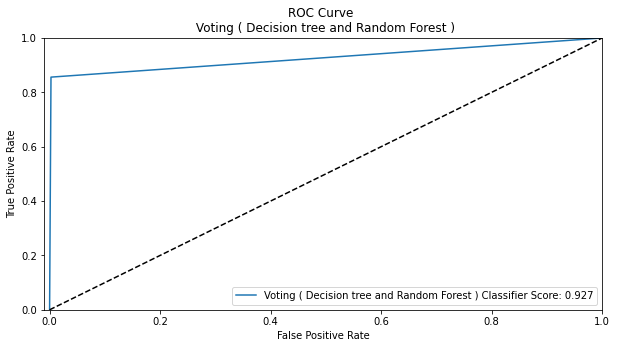

In [ ]:
plt.figure(figsize=(10,5))
plt.title('ROC Curve \n Voting ( Decision tree and Random Forest )')
plt.plot(voting_fpr, voting_tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.annotate('Minimum ROC Score of 50% \n', xy=(0.5, 0.5), xytext=(0.6, 0.3))
plt.legend([f"Voting ( Decision tree and Random Forest ) Classifier Score: {voting_roc:.3f}"],loc ="lower right")

In [ ]:
X=df.drop(['Class','Time','Amount'], axis=1)     
y=df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.2,
    random_state = 42)



training for model: VotingClassifier


Accuracy Score for VotingClassifier:
99.91924440855307%
Misclassification Score for VotingClassifier:
0.08075559144692952%
Precision Score for VotingClassifier:
85.71428571428571%
Sensitivity Score for VotingClassifier:
72.41379310344827%
Specificity Score for VotingClassifier:
99.97537205784049%


Text(0.5, 1.0, 'Confusion Matrix for VotingClassifier\n Accuracy : 99.9192% \n Misclassification : 0.0808%\n Precision : 85.7143%\n Sensitivity : 72.4138%\n Specificity : 99.9754%')

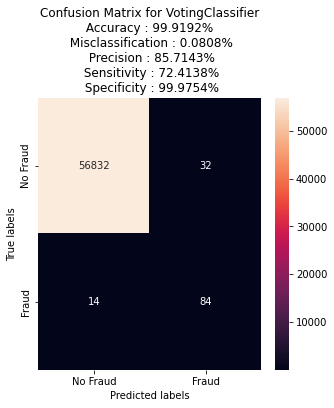

In [ ]:

model=voting_test
model_name=model.__class__.__name__
    
print(f"training for model: {model_name}\n\n")
    
#model.fit(X_train_ada,y_train_ada.values.ravel())
#score = model.score(X_test,y_test)*100
    
#print(f"Score for {model_name}:\n{score}")
    
y_pred=model.predict(X_test)
#predictions=np.argmax(y_pred,axis=1)
cm= confusion_matrix(y_test,y_pred)
TN=cm[0][0]
FN=cm[0][1]
FP=cm[1][0]
TP=cm[1][1]

Accuracy = ( TP + TN ) / (TP+TN+FP+FN)  *100
Misclassification = ( FP + FN ) / ( TP + TN + FP + FN ) *100
Precision = TP / ( TP + FP ) *100
Sensitivity = TP / ( TP + FN ) *100
Specificity = TN / ( TN + FP ) *100

print(f"Accuracy Score for {model_name}:\n{Accuracy}%")
print(f"Misclassification Score for {model_name}:\n{Misclassification}%")
print(f"Precision Score for {model_name}:\n{Precision}%")    
print(f"Sensitivity Score for {model_name}:\n{Sensitivity}%")
print(f"Specificity Score for {model_name}:\n{Specificity}%")

plt.figure(figsize=(5,5))
ax=plt.subplot()
labels = ['No Fraud', 'Fraud']
df_cm = pd.DataFrame(cm, index = labels,
                  columns = labels)
sns.heatmap(df_cm,annot=True,fmt='g',ax=ax)
    
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title(f'Confusion Matrix for {model_name}\n Accuracy : {Accuracy:.4f}% \
\n Misclassification : {Misclassification:.4f}%\
\n Precision : {Precision:.4f}%\
\n Sensitivity : {Sensitivity:.4f}%\
\n Specificity : {Specificity:.4f}%')

training for model: VotingClassifier


Accuracy Score for VotingClassifier:
99.91924440855307%
Misclassification Score for VotingClassifier:
0.08075559144692952%
Precision Score for VotingClassifier:
85.71428571428571%
Sensitivity Score for VotingClassifier:
72.41379310344827%
Specificity Score for VotingClassifier:
99.97537205784049%


Text(0.5, 1.0, 'Confusion Matrix for VotingClassifier\n Accuracy : 99.9192% \n Misclassification : 0.0808%\n Precision : 85.7143%\n Sensitivity : 72.4138%\n Specificity : 99.9754%')

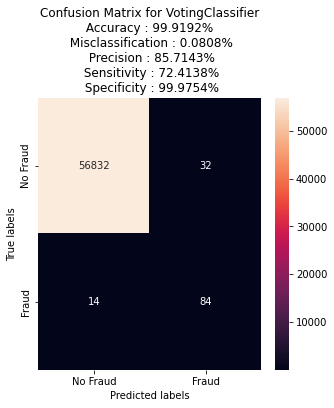

In [ ]:

model=voting_test
model_name=model.__class__.__name__
    
print(f"training for model: {model_name}\n\n")
    
#model.fit(X_train_ada,y_train_ada.values.ravel())
#score = model.score(X_test,y_test)*100
    
#print(f"Score for {model_name}:\n{score}")
    
y_pred=model.predict(X_test)
#predictions=np.argmax(y_pred,axis=1)
cm= confusion_matrix(y_test,y_pred)
TN=cm[0][0]
FN=cm[0][1]
FP=cm[1][0]
TP=cm[1][1]

Accuracy = ( TP + TN ) / (TP+TN+FP+FN)  *100
Misclassification = ( FP + FN ) / ( TP + TN + FP + FN ) *100
Precision = TP / ( TP + FP ) *100
Sensitivity = TP / ( TP + FN ) *100
Specificity = TN / ( TN + FP ) *100

print(f"Accuracy Score for {model_name}:\n{Accuracy}%")
print(f"Misclassification Score for {model_name}:\n{Misclassification}%")
print(f"Precision Score for {model_name}:\n{Precision}%")    
print(f"Sensitivity Score for {model_name}:\n{Sensitivity}%")
print(f"Specificity Score for {model_name}:\n{Specificity}%")

plt.figure(figsize=(5,5))
ax=plt.subplot()
labels = ['No Fraud', 'Fraud']
df_cm = pd.DataFrame(cm, index = labels,
                  columns = labels)
sns.heatmap(df_cm,annot=True,fmt='g',ax=ax)
    
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title(f'Confusion Matrix for {model_name}\n Accuracy : {Accuracy:.4f}% \
\n Misclassification : {Misclassification:.4f}%\
\n Precision : {Precision:.4f}%\
\n Sensitivity : {Sensitivity:.4f}%\
\n Specificity : {Specificity:.4f}%')

Accuracy Score for Actual Data:
100.0%
Misclassification Score for Actual Data:
0.0%
Precision Score for Actual Data:
100.0%
Sensitivity Score for Actual Data:
100.0%
Specificity Score for Actual Data:
100.0%


Text(0.5, 1.0, 'Confusion Matrix for Actual Data\n Accuracy : 100.0000% \n Misclassification : 0.0000%\n Precision : 100.0000%\n Sensitivity : 100.0000%\n Specificity : 100.0000%')

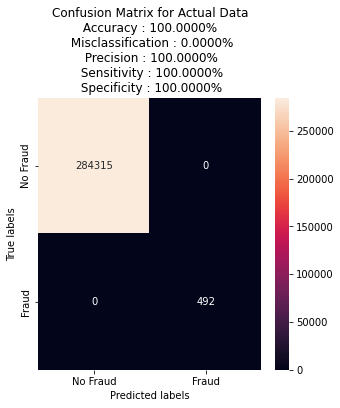

In [ ]:

#model=voting_test
model_name="Actual Data"
    
#print(f"training for model: {model_name}\n\n")
    
#model.fit(X_train_ada,y_train_ada.values.ravel())
#score = model.score(X_test,y_test)*100
    
#print(f"Score for {model_name}:\n{score}")
    
#y_pred=model.predict(X)
#predictions=np.argmax(y_pred,axis=1)
cm= confusion_matrix(y,y)
TN=cm[0][0]
FN=cm[0][1]
FP=cm[1][0]
TP=cm[1][1]

Accuracy = ( TP + TN ) / (TP+TN+FP+FN)  *100
Misclassification = ( FP + FN ) / ( TP + TN + FP + FN ) *100
Precision = TP / ( TP + FP ) *100
Sensitivity = TP / ( TP + FN ) *100
Specificity = TN / ( TN + FP ) *100

print(f"Accuracy Score for {model_name}:\n{Accuracy}%")
print(f"Misclassification Score for {model_name}:\n{Misclassification}%")
print(f"Precision Score for {model_name}:\n{Precision}%")    
print(f"Sensitivity Score for {model_name}:\n{Sensitivity}%")
print(f"Specificity Score for {model_name}:\n{Specificity}%")

plt.figure(figsize=(5,5))
ax=plt.subplot()
labels = ['No Fraud', 'Fraud']
df_cm = pd.DataFrame(cm, index = labels,
                  columns = labels)
sns.heatmap(df_cm,annot=True,fmt='g',ax=ax)
    
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title(f'Confusion Matrix for {model_name}\n Accuracy : {Accuracy:.4f}% \
\n Misclassification : {Misclassification:.4f}%\
\n Precision : {Precision:.4f}%\
\n Sensitivity : {Sensitivity:.4f}%\
\n Specificity : {Specificity:.4f}%')

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

In [ ]:
scaler = Normalizer()
cnn = KerasClassifier(build_fn=model_T)
cnn._estimator_type = "classifier"
cnn_pipe = Pipeline([('scaler', scaler), ('cnn', cnn)])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [ ]:
#estimators = [('Dec Tree',clf1), ('Random Forest',clf2)], voting='soft'

In [ ]:
X=df.drop(['Class','Time','Amount'], axis=1)     
y=df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.2,
    random_state = 42)



In [ ]:
ensemble = VotingClassifier(estimators=[('Dec Tree',clf1), 
                                        ('Random Forest',clf2),
                                        ('Sequential', cnn_pipe)], 
                            voting='hard')

In [ ]:
ensemble.fit(X_train, y_train.values.ravel())

INFO:tensorflow:Assets written to: ram://5120713c-810c-47d5-b89b-6c3c6074cad1/assets


ValueError: ignored

In [ ]:

model=ensemble
model_name=model.__class__.__name__
    
print(f"training for model: {model_name}\n\n")
    
#model.fit(X_train_ada,y_train_ada.values.ravel())
#score = model.score(X_test,y_test)*100
    
print(f"Score for {model_name}:\n{score}")
    
y_pred=model.predict(X_test)
#predictions=np.argmax(y_pred,axis=1)
cm= confusion_matrix(y_test,y_pred)
TN=cm[0][0]
FN=cm[0][1]
FP=cm[1][0]
TP=cm[1][1]

Accuracy = ( TP + TN ) / (TP+TN+FP+FN)  *100
Misclassification = ( FP + FN ) / ( TP + TN + FP + FN ) *100
Precision = TP / ( TP + FP ) *100
Sensitivity = TP / ( TP + FN ) *100
Specificity = TN / ( TN + FP ) *100

print(f"Accuracy Score for {model_name}:\n{Accuracy}%")
print(f"Misclassification Score for {model_name}:\n{Misclassification}%")
print(f"Precision Score for {model_name}:\n{Precision}%")    
print(f"Sensitivity Score for {model_name}:\n{Sensitivity}%")
print(f"Specificity Score for {model_name}:\n{Specificity}%")

plt.figure(figsize=(5,5))
ax=plt.subplot()
labels = ['No Fraud', 'Fraud']
df_cm = pd.DataFrame(cm, index = labels,
                  columns = labels)
sns.heatmap(df_cm,annot=True,fmt='g',ax=ax)
    
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title(f'Confusion Matrix for {model_name}\n Accuracy : {Accuracy:.4f}% \
\n Misclassification : {Misclassification:.4f}%\
\n Precision : {Precision:.4f}%\
\n Sensitivity : {Sensitivity:.4f}%\
\n Specificity : {Specificity:.4f}%')

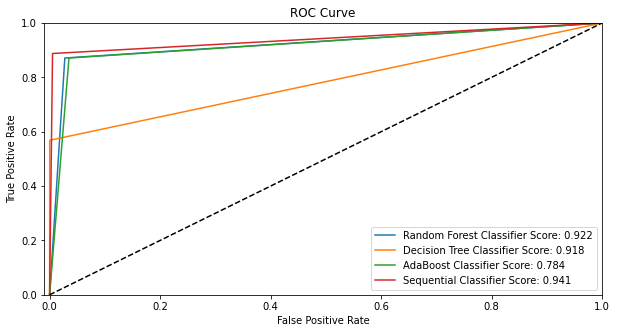

In [ ]:
plt.figure(figsize=(10,5))
plt.title('ROC Curve')
#plt.plot(voting_fpr, voting_tpr)
plt.plot(RFC_fpr, RFC_tpr)
plt.plot(Ada_tree_fpr, Ada_tree_tpr)
plt.plot(dec_tree_fpr, dec_tree_tpr)
plt.plot(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.annotate('Minimum ROC Score of 50% \n', xy=(0.5, 0.5), xytext=(0.6, 0.3))
plt.legend([f"Random Forest Classifier Score: {RFC_roc:.3f}",\
            f"Decision Tree Classifier Score: {dec_roc:.3f}",\
            f"AdaBoost Classifier Score: {Ada_roc:.3f}",\
            f"Sequential Classifier Score: {auc_keras:.3f}",\
            ],loc ="lower right")

In [ ]:
plt.figure()
plt.title('ROC Curve \n Decision Tree')
plt.plot(dec_tree_fpr, dec_tree_tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.annotate('Minimum ROC Score of 50% \n', xy=(0.5, 0.5), xytext=(0.6, 0.3))
plt.legend([f"Decision Tree Classifier Score: {dec_roc:.3f}"])

In [ ]:
plt.figure()
plt.title('ROC Curve \n Sequential')
plt.plot(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.annotate('Minimum ROC Score of 50% \n', xy=(0.5, 0.5), xytext=(0.6, 0.3))
plt.legend([f"Sequential Classifier Score: {auc_keras:.3f}"],loc ="lower right")

In [ ]:
plt.figure()
plt.title('ROC Curve \n AdaBoost')
plt.plot(Ada_tree_fpr, Ada_tree_tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.annotate('Minimum ROC Score of 50% \n', xy=(0.5, 0.5), xytext=(0.6, 0.3))
plt.legend([f"AdaBoost Classifier Score: {Ada_roc:.3f}"],loc ="lower right")

In [ ]:
X=df.drop(['Class','Time','Amount'], axis=1)     
y=df['Class']




training for model: VotingClassifier


Accuracy Score for VotingClassifier:
99.90660341915753%
Misclassification Score for VotingClassifier:
0.09339658084246524%
Precision Score for VotingClassifier:
84.34959349593495%
Sensitivity Score for VotingClassifier:
68.70860927152319%
Specificity Score for VotingClassifier:
99.97290668993641%


Text(0.5, 1.0, 'Confusion Matrix for VotingClassifier\n Accuracy : 99.9066% \n Misclassification : 0.0934%\n Precision : 84.3496%\n Sensitivity : 68.7086%\n Specificity : 99.9729%')

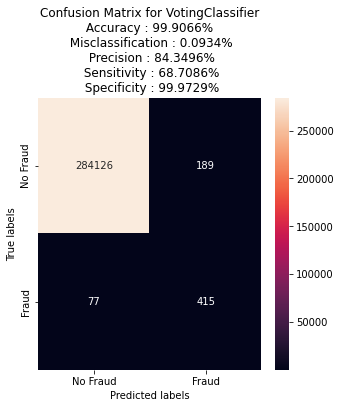

In [ ]:

model=voting_test
model_name=model.__class__.__name__
    
print(f"training for model: {model_name}\n\n")
    
#model.fit(X_train_ada,y_train_ada.values.ravel())
#score = model.score(X_test,y_test)*100
    
#print(f"Score for {model_name}:\n{score}")
    
y_pred=model.predict(X)
#predictions=np.argmax(y_pred,axis=1)
cm= confusion_matrix(y,y_pred)
TN=cm[0][0]
FN=cm[0][1]
FP=cm[1][0]
TP=cm[1][1]

Accuracy = ( TP + TN ) / (TP+TN+FP+FN)  *100
Misclassification = ( FP + FN ) / ( TP + TN + FP + FN ) *100
Precision = TP / ( TP + FP ) *100
Sensitivity = TP / ( TP + FN ) *100
Specificity = TN / ( TN + FP ) *100

print(f"Accuracy Score for {model_name}:\n{Accuracy}%")
print(f"Misclassification Score for {model_name}:\n{Misclassification}%")
print(f"Precision Score for {model_name}:\n{Precision}%")    
print(f"Sensitivity Score for {model_name}:\n{Sensitivity}%")
print(f"Specificity Score for {model_name}:\n{Specificity}%")

plt.figure(figsize=(5,5))
ax=plt.subplot()
labels = ['No Fraud', 'Fraud']
df_cm = pd.DataFrame(cm, index = labels,
                  columns = labels)
sns.heatmap(df_cm,annot=True,fmt='g',ax=ax)
    
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title(f'Confusion Matrix for {model_name}\n Accuracy : {Accuracy:.4f}% \
\n Misclassification : {Misclassification:.4f}%\
\n Precision : {Precision:.4f}%\
\n Sensitivity : {Sensitivity:.4f}%\
\n Specificity : {Specificity:.4f}%')

training for model: Sequential


Accuracy Score for Sequential:
99.4069668231469%
Misclassification Score for Sequential:
0.593033176853097%
Precision Score for Sequential:
87.60162601626016%
Sensitivity Score for Sequential:
20.93249150072851%
Specificity Score for Sequential:
99.97842601892852%


Text(0.5, 1.0, 'Confusion Matrix for Sequential\n Accuracy : 99.4070% \n Misclassification : 0.5930%\n Precision : 87.6016%\n Sensitivity : 20.9325%\n Specificity : 99.9784%')

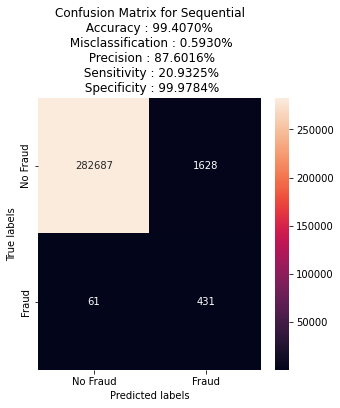

In [ ]:

model=model_T
model_name=model.__class__.__name__
    
print(f"training for model: {model_name}\n\n")
    
#model.fit(X_train_ada,y_train_ada.values.ravel())
#score = model.score(X_test,y_test)*100
    
#print(f"Score for {model_name}:\n{score}")
    
y_pred=model.predict(X)
predictions=np.argmax(y_pred,axis=1)
cm= confusion_matrix(y,predictions)
TN=cm[0][0]
FN=cm[0][1]
FP=cm[1][0]
TP=cm[1][1]

Accuracy = ( TP + TN ) / (TP+TN+FP+FN)  *100
Misclassification = ( FP + FN ) / ( TP + TN + FP + FN ) *100
Precision = TP / ( TP + FP ) *100
Sensitivity = TP / ( TP + FN ) *100
Specificity = TN / ( TN + FP ) *100

print(f"Accuracy Score for {model_name}:\n{Accuracy}%")
print(f"Misclassification Score for {model_name}:\n{Misclassification}%")
print(f"Precision Score for {model_name}:\n{Precision}%")    
print(f"Sensitivity Score for {model_name}:\n{Sensitivity}%")
print(f"Specificity Score for {model_name}:\n{Specificity}%")

plt.figure(figsize=(5,5))
ax=plt.subplot()
labels = ['No Fraud', 'Fraud']
df_cm = pd.DataFrame(cm, index = labels,
                  columns = labels)
sns.heatmap(df_cm,annot=True,fmt='g',ax=ax)
    
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title(f'Confusion Matrix for {model_name}\n Accuracy : {Accuracy:.4f}% \
\n Misclassification : {Misclassification:.4f}%\
\n Precision : {Precision:.4f}%\
\n Sensitivity : {Sensitivity:.4f}%\
\n Specificity : {Specificity:.4f}%')